In [1]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Project/Dataset

/content/drive/MyDrive/Project/Dataset


In [4]:
import pandas as pd
import os

original_data = pd.read_excel('data_clinical_scoring.xlsx')

In [5]:
original_data

,ID,video,time,scorer,D_TRUNK_R_tD,D_TRUNK_R_tD_max,D_TRUNK_R_tD_pscore,D_TRUNK_R_tA,D_TRUNK_R_tA_max,D_TRUNK_R_tA_pscore,...,D_LLP_R_tD_pscore,D_LLP_R_tA,D_LLP_R_tA_max,D_LLP_R_tA_pscore,CA_LLP_R_tD,CA_LLP_R_tD_max,CA_LLP_R_tD_pscore,CA_LLP_R_tA,CA_LLP_R_tA_max,CA_LLP_R_tA_pscore
0,1,47,T0,1,4,4,1.00,1,4,0.25,...,1.00,3,4,0.75,0,4,0.00,0,4,0.00
1,1,75,T12,1,2,4,0.50,1,4,0.25,...,1.00,2,4,0.50,0,4,0.00,0,4,0.00
2,1,26,T3,2,4,4,1.00,2,4,0.50,...,1.00,3,4,0.75,0,4,0.00,0,4,0.00
3,1,47,T0,2,4,4,1.00,2,4,0.50,...,1.00,3,4,0.75,0,4,0.00,0,4,0.00
4,1,75,T12,2,4,4,1.00,1,4,0.25,...,1.00,2,4,0.50,0,4,0.00,0,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,34,48,T0,1,0,4,0.00,0,4,0.00,...,999.00,999,999,999.00,999,999,999.00,999,999,999.00
157,34,64,T12,1,2,4,0.50,1,4,0.25,...,1.00,4,4,1.00,0,4,0.00,0,4,0.00
158,34,25,T3,3,1,4,0.25,1,4,0.25,...,0.50,2,4,0.50,2,4,0.50,2,4,0.50
159,34,48,T0,3,0,4,0.00,0,4,0.00,...,0.25,2,4,0.50,3,4,0.75,3,4,0.75


In [6]:
data_list = []
labels = []

In [7]:
dataset_for_0 = []

for index, row in original_data.iterrows():
      DIS_amplitude = row['D_RAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 0 and rater == 1):
          video_number = row['video']
          print(video_number)
          formatted_video_number = f'{video_number:03}'

          sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
          sitting_file_path = os.path.join('sitting', sitting_filename)

          if not os.path.exists(sitting_file_path):
            print(f"File {sitting_file_path} not found, skipping.")
            continue

          sitting_data_csv = pd.read_csv(sitting_file_path)
          sitting_right_arm = sitting_data_csv.iloc[2:502, 19:28].astype(float)
          dataset_for_0.append(sitting_right_arm)

          # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
          # lying_file_path = os.path.join('lying', lying_filename)

          # if not os.path.exists(lying_file_path):
          #   print(f"File {lying_file_path} not found, skipping.")
          #   continue

          # lying_data_csv = pd.read_csv(lying_file_path)
          # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)
          # dataset_for_0.append(lying_right_arm)



      DIS_amplitude = row['D_LAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 0 and rater == 1):
        video_number = row['video']
        print(video_number, 'LEFT')
        formatted_video_number = f'{video_number:03}'

        sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
        sitting_file_path = os.path.join('sitting', sitting_filename)

        if not os.path.exists(sitting_file_path):
          print(f"File {sitting_file_path} not found, skipping.")
          continue

        sitting_data_csv = pd.read_csv(sitting_file_path)
        sitting_right_arm = sitting_data_csv.iloc[2:502, 28:37].astype(float)
        # Number of columns to group together
        chunk_size = 3

        # Calculate the number of chunks
        num_chunks = sitting_right_arm.shape[1] // chunk_size

        # Create a list to hold the column chunks
        column_chunks = []

        # Slice the DataFrame into chunks
        for i in range(num_chunks):
            start_index = i * chunk_size
            end_index = start_index + chunk_size
            chunk = sitting_right_arm.iloc[:, start_index:end_index]
            column_chunks.append(chunk)

        # Reverse the order of the chunks
        reversed_chunks = column_chunks[::-1]

        # Concatenate the reversed chunks
        reordered_df = pd.concat(reversed_chunks, axis=1)

        dataset_for_0.append(reordered_df)


        # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
        # lying_file_path = os.path.join('lying', lying_filename)

        # if not os.path.exists(lying_file_path):
        #   print(f"File {lying_file_path} not found, skipping.")
        #   continue

        # lying_data_csv = pd.read_csv(lying_file_path)
        # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)

        # # Number of columns to group together
        # chunk_size = 3

        # # Calculate the number of chunks
        # num_chunks = lying_right_arm.shape[1] // chunk_size

        # # Create a list to hold the column chunks
        # column_chunks = []

        # # Slice the DataFrame into chunks
        # for i in range(num_chunks):
        #     start_index = i * chunk_size
        #     end_index = start_index + chunk_size
        #     chunk = lying_right_arm.iloc[:, start_index:end_index]
        #     column_chunks.append(chunk)

        # # Reverse the order of the chunks
        # reversed_chunks = column_chunks[::-1]

        # # Concatenate the reversed chunks
        # reordered_df = pd.concat(reversed_chunks, axis=1)

        # dataset_for_0.append(reordered_df)

81
81 LEFT
55
55 LEFT
105
105 LEFT
3
3 LEFT
10
97
51
73
73 LEFT


In [8]:
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader


for i in range(len(dataset_for_0)):

          DIS_amplitude = 0

          data = dataset_for_0[i].to_numpy()

          num_frames, num_features = data.shape
          num_body_parts = num_features // 3
          displacement_temp = data[:, :num_body_parts*3].reshape(num_frames, num_body_parts, 3)
          displacement_temp = np.diff(displacement_temp, axis=0)
          displacement_temp = np.abs(displacement_temp)

          result_array = []
          for i in range(num_frames-1):
              result = []
              for j in range(3):  # Assuming 3 body parts
                  result.append(displacement_temp[i, j, :2])

              result_array.append(result)

          displacement = np.array(result_array)

          velocity = np.linalg.norm(displacement, axis=2)

          acceleration = np.diff(velocity, axis=0)

          combined_displacement = np.concatenate([
              displacement[1:],  # (num_frames-1, num_body_parts, 2)
            ], axis=2)  # Shape: (num_frames-1, num_body_parts, 2)

          combined_velocity = np.expand_dims(velocity[1:], axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)
          combined_acceleration = np.expand_dims(acceleration, axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)

          # Concatenate features for each joint: (num_frames-2, num_body_parts, 4)
          combined_features = np.concatenate([
              combined_displacement,  # (num_frames-1, num_body_parts, 2)
              combined_velocity,      # (num_frames-2, num_body_parts, 1)
              combined_acceleration   # (num_frames-2, num_body_parts, 1)
          ], axis=2)  # Shape: (num_frames-2, num_body_parts, 4)


          data_list.append(combined_features)
          labels.append(DIS_amplitude)

In [9]:
dataset_for_1 = []

for index, row in original_data.iterrows():
      DIS_amplitude = row['D_RAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 1 and rater == 1):
          video_number = row['video']
          print(video_number)

          formatted_video_number = f'{video_number:03}'

          sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
          sitting_file_path = os.path.join('sitting', sitting_filename)

          if not os.path.exists(sitting_file_path):
            print(f"File {sitting_file_path} not found, skipping.")
            continue

          sitting_data_csv = pd.read_csv(sitting_file_path)
          sitting_right_arm = sitting_data_csv.iloc[2:502, 19:28].astype(float)
          dataset_for_1.append(sitting_right_arm)

          # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
          # lying_file_path = os.path.join('lying', lying_filename)

          # if not os.path.exists(lying_file_path):
          #   print(f"File {lying_file_path} not found, skipping.")
          #   continue

          # lying_data_csv = pd.read_csv(lying_file_path)
          # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)
          # dataset_for_1.append(lying_right_arm)



      DIS_amplitude = row['D_LAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 1 and rater == 1):
        video_number = row['video']
        print(video_number, 'LEFT')
        formatted_video_number = f'{video_number:03}'

        sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
        sitting_file_path = os.path.join('sitting', sitting_filename)

        if not os.path.exists(sitting_file_path):
          print(f"File {sitting_file_path} not found, skipping.")
          continue

        sitting_data_csv = pd.read_csv(sitting_file_path)
        sitting_right_arm = sitting_data_csv.iloc[2:502, 28:37].astype(float)
        # Number of columns to group together
        chunk_size = 3

        # Calculate the number of chunks
        num_chunks = sitting_right_arm.shape[1] // chunk_size

        # Create a list to hold the column chunks
        column_chunks = []

        # Slice the DataFrame into chunks
        for i in range(num_chunks):
            start_index = i * chunk_size
            end_index = start_index + chunk_size
            chunk = sitting_right_arm.iloc[:, start_index:end_index]
            column_chunks.append(chunk)

        # Reverse the order of the chunks
        reversed_chunks = column_chunks[::-1]

        # Concatenate the reversed chunks
        reordered_df = pd.concat(reversed_chunks, axis=1)

        dataset_for_1.append(reordered_df)


        # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
        # lying_file_path = os.path.join('lying', lying_filename)

        # if not os.path.exists(lying_file_path):
        #   print(f"File {lying_file_path} not found, skipping.")
        #   continue

        # lying_data_csv = pd.read_csv(lying_file_path)
        # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)

        # # Number of columns to group together
        # chunk_size = 3

        # # Calculate the number of chunks
        # num_chunks = lying_right_arm.shape[1] // chunk_size

        # # Create a list to hold the column chunks
        # column_chunks = []

        # # Slice the DataFrame into chunks
        # for i in range(num_chunks):
        #     start_index = i * chunk_size
        #     end_index = start_index + chunk_size
        #     chunk = lying_right_arm.iloc[:, start_index:end_index]
        #     column_chunks.append(chunk)

        # # Reverse the order of the chunks
        # reversed_chunks = column_chunks[::-1]

        # # Concatenate the reversed chunks
        # reordered_df = pd.concat(reversed_chunks, axis=1)

        # dataset_for_1.append(reordered_df)

54 LEFT
12
12 LEFT
79
48
48 LEFT


In [10]:
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader


for i in range(len(dataset_for_1)):

          DIS_amplitude = 1

          data = dataset_for_1[i].to_numpy()

          num_frames, num_features = data.shape
          num_body_parts = num_features // 3
          displacement_temp = data[:, :num_body_parts*3].reshape(num_frames, num_body_parts, 3)
          displacement_temp = np.diff(displacement_temp, axis=0)
          displacement_temp = np.abs(displacement_temp)

          result_array = []
          for i in range(num_frames-1):
              result = []
              for j in range(3):  # Assuming 3 body parts
                  result.append(displacement_temp[i, j, :2])

              result_array.append(result)

          displacement = np.array(result_array)

          velocity = np.linalg.norm(displacement, axis=2)
          acceleration = np.diff(velocity, axis=0)

          combined_displacement = np.concatenate([
              displacement[1:],  # (num_frames-1, num_body_parts, 2)
            ], axis=2)  # Shape: (num_frames-1, num_body_parts, 2)

          combined_velocity = np.expand_dims(velocity[1:], axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)
          combined_acceleration = np.expand_dims(acceleration, axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)

          # Concatenate features for each joint: (num_frames-2, num_body_parts, 4)
          combined_features = np.concatenate([
              combined_displacement,  # (num_frames-1, num_body_parts, 2)
              combined_velocity,      # (num_frames-2, num_body_parts, 1)
              combined_acceleration   # (num_frames-2, num_body_parts, 1)
          ], axis=2)  # Shape: (num_frames-2, num_body_parts, 4)


          # # print(len(combined_features[6]))
          # if(len(combined_features) < 498):
          #      combined_features = pad_list_to_500(combined_features)

          data_list.append(combined_features)
          labels.append(DIS_amplitude)

In [11]:
dataset_for_2 = []

for index, row in original_data.iterrows():
      DIS_amplitude = row['D_RAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 2 and rater == 1):
          video_number = row['video']
          print(video_number)
          formatted_video_number = f'{video_number:03}'

          sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
          sitting_file_path = os.path.join('sitting', sitting_filename)

          if not os.path.exists(sitting_file_path):
            print(f"File {sitting_file_path} not found, skipping.")
            continue

          sitting_data_csv = pd.read_csv(sitting_file_path)
          sitting_right_arm = sitting_data_csv.iloc[2:502, 19:28].astype(float)
          dataset_for_2.append(sitting_right_arm)

          # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
          # lying_file_path = os.path.join('lying', lying_filename)

          # if not os.path.exists(lying_file_path):
          #   print(f"File {lying_file_path} not found, skipping.")
          #   continue

          # lying_data_csv = pd.read_csv(lying_file_path)
          # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)
          # dataset_for_2.append(lying_right_arm)



      DIS_amplitude = row['D_LAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 2 and rater == 1):
        video_number = row['video']
        print(video_number, 'LEFT')
        formatted_video_number = f'{video_number:03}'

        sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
        sitting_file_path = os.path.join('sitting', sitting_filename)

        if not os.path.exists(sitting_file_path):
          print(f"File {sitting_file_path} not found, skipping.")
          continue

        sitting_data_csv = pd.read_csv(sitting_file_path)
        sitting_right_arm = sitting_data_csv.iloc[2:502, 28:37].astype(float)
        # Number of columns to group together
        chunk_size = 3

        # Calculate the number of chunks
        num_chunks = sitting_right_arm.shape[1] // chunk_size

        # Create a list to hold the column chunks
        column_chunks = []

        # Slice the DataFrame into chunks
        for i in range(num_chunks):
            start_index = i * chunk_size
            end_index = start_index + chunk_size
            chunk = sitting_right_arm.iloc[:, start_index:end_index]
            column_chunks.append(chunk)

        # Reverse the order of the chunks
        reversed_chunks = column_chunks[::-1]

        # Concatenate the reversed chunks
        reordered_df = pd.concat(reversed_chunks, axis=1)

        dataset_for_2.append(reordered_df)


        # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
        # lying_file_path = os.path.join('lying', lying_filename)

        # if not os.path.exists(lying_file_path):
        #   print(f"File {lying_file_path} not found, skipping.")
        #   continue

        # lying_data_csv = pd.read_csv(lying_file_path)
        # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)

        # # Number of columns to group together
        # chunk_size = 3

        # # Calculate the number of chunks
        # num_chunks = lying_right_arm.shape[1] // chunk_size

        # # Create a list to hold the column chunks
        # column_chunks = []

        # # Slice the DataFrame into chunks
        # for i in range(num_chunks):
        #     start_index = i * chunk_size
        #     end_index = start_index + chunk_size
        #     chunk = lying_right_arm.iloc[:, start_index:end_index]
        #     column_chunks.append(chunk)

        # # Reverse the order of the chunks
        # reversed_chunks = column_chunks[::-1]

        # # Concatenate the reversed chunks
        # reordered_df = pd.concat(reversed_chunks, axis=1)

        # dataset_for_2.append(reordered_df)

47 LEFT
4
80 LEFT
45
83 LEFT
85
1
1 LEFT
31
112
2
2 LEFT
74
74 LEFT
106 LEFT
111 LEFT
76
77 LEFT
82
56
88
88 LEFT
84
84 LEFT
87
87 LEFT
40 LEFT
95 LEFT
91
58 LEFT
7
7 LEFT
89
89 LEFT
10 LEFT
97 LEFT
9
9 LEFT
94
94 LEFT
42
41
92
96
96 LEFT
107
107 LEFT
110
110 LEFT
51 LEFT
64
64 LEFT


In [12]:
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader


for i in range(len(dataset_for_2)):

          DIS_amplitude = 2

          data = dataset_for_2[i].to_numpy()

          num_frames, num_features = data.shape
          num_body_parts = num_features // 3
          displacement_temp = data[:, :num_body_parts*3].reshape(num_frames, num_body_parts, 3)
          displacement_temp = np.diff(displacement_temp, axis=0)
          displacement_temp = np.abs(displacement_temp)


          result_array = []
          for i in range(num_frames-1):
              result = []
              for j in range(3):  # Assuming 3 body parts
                  result.append(displacement_temp[i, j, :2])

              result_array.append(result)

          displacement = np.array(result_array)

          velocity = np.linalg.norm(displacement, axis=2)
          acceleration = np.diff(velocity, axis=0)

          combined_displacement = np.concatenate([
              displacement[1:],  # (num_frames-1, num_body_parts, 2)
            ], axis=2)  # Shape: (num_frames-1, num_body_parts, 2)

          combined_velocity = np.expand_dims(velocity[1:], axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)
          combined_acceleration = np.expand_dims(acceleration, axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)

          # Concatenate features for each joint: (num_frames-2, num_body_parts, 4)
          combined_features = np.concatenate([
              combined_displacement,  # (num_frames-1, num_body_parts, 2)
              combined_velocity,      # (num_frames-2, num_body_parts, 1)
              combined_acceleration   # (num_frames-2, num_body_parts, 1)
          ], axis=2)  # Shape: (num_frames-2, num_body_parts, 4)


          # if(len(combined_features) < 498):
          #      combined_features = pad_list_to_500(combined_features)

          data_list.append(combined_features)
          labels.append(DIS_amplitude)


In [13]:
dataset_for_3 = []

for index, row in original_data.iterrows():
      DIS_amplitude = row['D_RAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 3 and rater == 1):
          video_number = row['video']
          print(video_number)
          formatted_video_number = f'{video_number:03}'

          sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
          sitting_file_path = os.path.join('sitting', sitting_filename)

          if not os.path.exists(sitting_file_path):
            print(f"File {sitting_file_path} not found, skipping.")
            continue

          sitting_data_csv = pd.read_csv(sitting_file_path)
          sitting_right_arm = sitting_data_csv.iloc[2:502, 19:28].astype(float)
          dataset_for_3.append(sitting_right_arm)

          # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
          # lying_file_path = os.path.join('lying', lying_filename)

          # if not os.path.exists(lying_file_path):
          #   print(f"File {lying_file_path} not found, skipping.")
          #   continue

          # lying_data_csv = pd.read_csv(lying_file_path)
          # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)
          # dataset_for_3.append(lying_right_arm)



      DIS_amplitude = row['D_LAP_R_tA']
      rater = row['scorer']

      if(DIS_amplitude == 3 and rater == 1):
        video_number = row['video']
        print(video_number, 'LEFT')
        formatted_video_number = f'{video_number:03}'

        sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
        sitting_file_path = os.path.join('sitting', sitting_filename)

        if not os.path.exists(sitting_file_path):
          print(f"File {sitting_file_path} not found, skipping.")
          continue

        sitting_data_csv = pd.read_csv(sitting_file_path)
        sitting_right_arm = sitting_data_csv.iloc[2:502, 28:37].astype(float)
        # Number of columns to group together
        chunk_size = 3

        # Calculate the number of chunks
        num_chunks = sitting_right_arm.shape[1] // chunk_size

        # Create a list to hold the column chunks
        column_chunks = []

        # Slice the DataFrame into chunks
        for i in range(num_chunks):
            start_index = i * chunk_size
            end_index = start_index + chunk_size
            chunk = sitting_right_arm.iloc[:, start_index:end_index]
            column_chunks.append(chunk)

        # Reverse the order of the chunks
        reversed_chunks = column_chunks[::-1]

        # Concatenate the reversed chunks
        reordered_df = pd.concat(reversed_chunks, axis=1)

        dataset_for_3.append(reordered_df)


        # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
        # lying_file_path = os.path.join('lying', lying_filename)

        # if not os.path.exists(lying_file_path):
        #   print(f"File {lying_file_path} not found, skipping.")
        #   continue

        # lying_data_csv = pd.read_csv(lying_file_path)
        # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)

        # # Number of columns to group together
        # chunk_size = 3

        # # Calculate the number of chunks
        # num_chunks = lying_right_arm.shape[1] // chunk_size

        # # Create a list to hold the column chunks
        # column_chunks = []

        # # Slice the DataFrame into chunks
        # for i in range(num_chunks):
        #     start_index = i * chunk_size
        #     end_index = start_index + chunk_size
        #     chunk = lying_right_arm.iloc[:, start_index:end_index]
        #     column_chunks.append(chunk)

        # # Reverse the order of the chunks
        # reversed_chunks = column_chunks[::-1]

        # # Concatenate the reversed chunks
        # reordered_df = pd.concat(reversed_chunks, axis=1)

        # dataset_for_3.append(reordered_df)

75 LEFT
46
46 LEFT
78
78 LEFT
4 LEFT
80
45 LEFT
5
5 LEFT
83
85 LEFT
31 LEFT
112 LEFT
106
52
76 LEFT
77
54
82 LEFT
86
86 LEFT
56 LEFT
44
44 LEFT
90
90 LEFT
98
40
95
93 LEFT
92 LEFT
53 LEFT
79 LEFT


In [14]:
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader


for i in range(len(dataset_for_3)):

          DIS_amplitude = 3

          data = dataset_for_3[i].to_numpy()


          num_frames, num_features = data.shape
          num_body_parts = num_features // 3
          displacement_temp = data[:, :num_body_parts*3].reshape(num_frames, num_body_parts, 3)
          displacement_temp = np.diff(displacement_temp, axis=0)
          displacement_temp = np.abs(displacement_temp)


          result_array = []
          for i in range(num_frames-1):
              result = []
              for j in range(3):  # Assuming 3 body parts
                  result.append(displacement_temp[i, j, :2])

              result_array.append(result)

          displacement = np.array(result_array)

          velocity = np.linalg.norm(displacement, axis=2)
          acceleration = np.diff(velocity, axis=0)

          combined_displacement = np.concatenate([
              displacement[1:],  # (num_frames-1, num_body_parts, 2)
            ], axis=2)  # Shape: (num_frames-1, num_body_parts, 2)

          combined_velocity = np.expand_dims(velocity[1:], axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)
          combined_acceleration = np.expand_dims(acceleration, axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)

          # Concatenate features for each joint: (num_frames-2, num_body_parts, 4)
          combined_features = np.concatenate([
              combined_displacement,  # (num_frames-1, num_body_parts, 2)
              combined_velocity,      # (num_frames-2, num_body_parts, 1)
              combined_acceleration   # (num_frames-2, num_body_parts, 1)
          ], axis=2)  # Shape: (num_frames-2, num_body_parts, 4)

          # if(len(combined_features) < 498):
          #      combined_features = pad_list_to_500(combined_features)
          data_list.append(combined_features)
          labels.append(DIS_amplitude)

In [15]:
dataset_for_4 = []

for index, row in original_data.iterrows():
      DIS_amplitude = row['D_RAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 4 and rater == 1):
          video_number = row['video']
          print(video_number)
          formatted_video_number = f'{video_number:03}'

          sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
          sitting_file_path = os.path.join('sitting', sitting_filename)

          if not os.path.exists(sitting_file_path):
            print(f"File {sitting_file_path} not found, skipping.")
            continue

          sitting_data_csv = pd.read_csv(sitting_file_path)
          sitting_right_arm = sitting_data_csv.iloc[2:502, 19:28].astype(float)
          dataset_for_4.append(sitting_right_arm)

          # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
          # lying_file_path = os.path.join('lying', lying_filename)

          # if not os.path.exists(lying_file_path):
          #   print(f"File {lying_file_path} not found, skipping.")
          #   continue

          # lying_data_csv = pd.read_csv(lying_file_path)
          # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)
          # dataset_for_4.append(lying_right_arm)



      DIS_amplitude = row['D_LAP_R_tA']
      rater = row['scorer']
      if(DIS_amplitude == 4 and rater == 1):
        video_number = row['video']
        print(video_number, 'LEFT')
        formatted_video_number = f'{video_number:03}'

        sitting_filename = f'{formatted_video_number}_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
        sitting_file_path = os.path.join('sitting', sitting_filename)

        if not os.path.exists(sitting_file_path):
          print(f"File {sitting_file_path} not found, skipping.")
          continue

        sitting_data_csv = pd.read_csv(sitting_file_path)
        sitting_right_arm = sitting_data_csv.iloc[2:502, 28:37].astype(float)
        # Number of columns to group together
        chunk_size = 3

        # Calculate the number of chunks
        num_chunks = sitting_right_arm.shape[1] // chunk_size

        # Create a list to hold the column chunks
        column_chunks = []

        # Slice the DataFrame into chunks
        for i in range(num_chunks):
            start_index = i * chunk_size
            end_index = start_index + chunk_size
            chunk = sitting_right_arm.iloc[:, start_index:end_index]
            column_chunks.append(chunk)

        # Reverse the order of the chunks
        reversed_chunks = column_chunks[::-1]

        # Concatenate the reversed chunks
        reordered_df = pd.concat(reversed_chunks, axis=1)

        dataset_for_4.append(reordered_df)


        # lying_filename = f'{formatted_video_number}_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'
        # lying_file_path = os.path.join('lying', lying_filename)

        # if not os.path.exists(lying_file_path):
        #   print(f"File {lying_file_path} not found, skipping.")
        #   continue

        # lying_data_csv = pd.read_csv(lying_file_path)
        # lying_right_arm = lying_data_csv.iloc[2:502, 19:28].astype(float)

        # # Number of columns to group together
        # chunk_size = 3

        # # Calculate the number of chunks
        # num_chunks = lying_right_arm.shape[1] // chunk_size

        # # Create a list to hold the column chunks
        # column_chunks = []

        # # Slice the DataFrame into chunks
        # for i in range(num_chunks):
        #     start_index = i * chunk_size
        #     end_index = start_index + chunk_size
        #     chunk = lying_right_arm.iloc[:, start_index:end_index]
        #     column_chunks.append(chunk)

        # # Reverse the order of the chunks
        # reversed_chunks = column_chunks[::-1]

        # # Concatenate the reversed chunks
        # reordered_df = pd.concat(reversed_chunks, axis=1)

        # dataset_for_4.append(reordered_df)

47
75
111
6
6 LEFT
43
43 LEFT
57
57 LEFT
102
102 LEFT
39
39 LEFT
98 LEFT
8
8 LEFT
91 LEFT
58
93
42 LEFT
41 LEFT
59
59 LEFT
53
109
109 LEFT


In [16]:
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader


for i in range(len(dataset_for_4)):

          DIS_amplitude = 4

          data = dataset_for_4[i].to_numpy()


          num_frames, num_features = data.shape
          num_body_parts = num_features // 3


          displacement_temp = data[:, :num_body_parts*3].reshape(num_frames, num_body_parts, 3)

          displacement_temp = np.diff(displacement_temp, axis=0)
          displacement_temp = np.abs(displacement_temp)


          result_array = []
          for i in range(num_frames-1):
              result = []
              for j in range(3):  # Assuming 3 body parts
                  result.append(displacement_temp[i, j, :2])

              result_array.append(result)


          displacement = np.array(result_array)

          velocity = np.linalg.norm(displacement, axis=2)
          acceleration = np.diff(velocity, axis=0)

          combined_displacement = np.concatenate([
              displacement[1:],  # (num_frames-1, num_body_parts, 2)
            ], axis=2)  # Shape: (num_frames-1, num_body_parts, 2)

          combined_velocity = np.expand_dims(velocity[1:], axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)
          combined_acceleration = np.expand_dims(acceleration, axis=2)  # Add channel dimension: (num_frames-2, num_body_parts, 1)

          # Concatenate features for each joint: (num_frames-2, num_body_parts, 4)
          combined_features = np.concatenate([
              combined_displacement,  # (num_frames-1, num_body_parts, 2)
              combined_velocity,      # (num_frames-2, num_body_parts, 1)
              combined_acceleration   # (num_frames-2, num_body_parts, 1)
          ], axis=2)  # Shape: (num_frames-2, num_body_parts, 4)

          # if(len(combined_features) < 498):
          #      combined_features = pad_list_to_500(combined_features)
          data_list.append(combined_features)
          labels.append(DIS_amplitude)


[13, 6, 52, 34, 26]


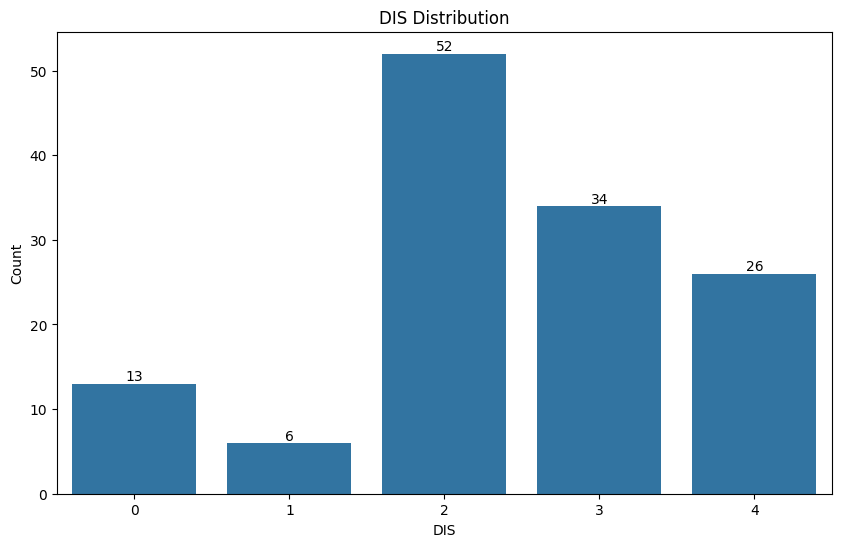

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch_geometric.datasets import TUDataset

def visualize_class_distribution():

    # Ensure all classes from 0 to 4 are represented
    classes = list(range(5))
    class_counts = [labels.count(c) for c in classes]
    print(class_counts)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=classes, y=class_counts)

    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('DIS Distribution')
    plt.xlabel('DIS')
    plt.ylabel('Count')
    plt.show()

# Assuming data_list is your dataset
visualize_class_distribution()

In [18]:
print(len(data_list))
print(len(labels))

131
131


In [25]:
my_data = torch.tensor(data_list)
my_label = torch.tensor(labels)
my_data = my_data.type(torch.float)

<ipython-input-25-5de15b6acfb1>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  my_data = torch.tensor(data_list)


In [26]:
torch.manual_seed(42)
np.random.seed(42)

In [27]:
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np

# Define the desired number of samples per class
num_samples_per_class = 6
num_classes = len(torch.unique(my_label))

# Create lists to hold the indices for each class
class_indices = {i: [] for i in range(num_classes)}


# Populate the class_indices with the indices of each class
for idx, label in enumerate(my_label.numpy()):
    class_indices[label].append(idx)

# Ensure we have enough samples for each class
for i in range(num_classes):
    if i == 1:
        continue
    if len(class_indices[i]) < num_samples_per_class:
        raise ValueError(f"Not enough samples for class {i}. Found {len(class_indices[i])}, but needed {num_samples_per_class}.")

# Sample the desired number of indices from each class
selected_indices = []
for i in range(num_classes):
    if i == 1:
          selected_indices.extend(np.random.choice(class_indices[1], 3, replace=False))
          continue
    selected_indices.extend(np.random.choice(class_indices[i], num_samples_per_class, replace=False))


# Create a TensorDataset with the selected indices
balanced_dataset = Subset(TensorDataset(my_data, my_label), selected_indices)

# Define your batch size
batch_size = 32

# Create a DataLoader for the balanced dataset
balanced_loader = DataLoader(balanced_dataset, batch_size=batch_size, shuffle=True)

In [28]:
# Determine the remaining indices
remaining_indices = list(set(range(len(my_data))) - set(selected_indices))

# Create a TensorDataset with the remaining indices
remaining_dataset = Subset(TensorDataset(my_data, my_label), remaining_indices)

# Create a DataLoader for the remaining dataset
remaining_loader = DataLoader(remaining_dataset, batch_size=batch_size, shuffle=True)

# Verify the class distribution in the remaining dataset
from collections import Counter

def verify_class_distribution(data_loader):
    all_labels = []
    for _, labels in data_loader:
        all_labels.append(labels)
    all_labels = torch.cat(all_labels, dim=0)
    class_counts = Counter(all_labels.numpy())
    return class_counts

print("Class distribution in the balanced training dataset:")
print(verify_class_distribution(balanced_loader))

print("Class distribution in the remaining dataset:")
print(verify_class_distribution(remaining_loader))

Class distribution in the balanced training dataset:
Counter({0: 6, 2: 6, 3: 6, 4: 6, 1: 3})
Class distribution in the remaining dataset:
Counter({2: 46, 3: 28, 4: 20, 0: 7, 1: 3})


In [29]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from collections import Counter

# Function to one-hot encode labels
def one_hot_encode_labels(y, num_classes):
    """Convert labels to one-hot encoding."""
    encoder = OneHotEncoder(categories='auto', sparse=False)
    y = y.reshape(-1, 1)
    y_one_hot = encoder.fit_transform(y)
    return y_one_hot

# Function to verify class distribution
def verify_class_distribution(data_loader):
    all_labels = []
    for _, labels in data_loader:
        all_labels.append(labels)
    all_labels = torch.cat(all_labels, dim=0)
    class_counts = Counter(all_labels.numpy())
    return class_counts

# Function to extract data and labels from a DataLoader
def extract_data_labels(data_loader):
    all_data = []
    all_labels = []
    for data, labels in data_loader:
        all_data.append(data)
        all_labels.append(labels)
    return torch.cat(all_data, dim=0), torch.cat(all_labels, dim=0)

In [30]:
import torch
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset, DataLoader, Subset

# Function to apply mixup between two classes
def mixup_pair(X, y, indices_a, indices_b, alpha=0.6):
    """Apply mixup between two specified classes."""
    if alpha <= 0:
        return X, y

    # Ensure the same number of examples from each class
    min_len = 2

    # Randomly sample to equalize the number of samples
    indices_a = np.random.choice(indices_a, min_len, replace=False)
    indices_b = np.random.choice(indices_b, min_len, replace=False)

    # Sample lambda from Beta distribution
    lam = np.random.beta(alpha, alpha, size=min_len)

    # Generate mixed examples
    X_a, y_a = X[indices_a], y[indices_a]
    X_b, y_b = X[indices_b], y[indices_b]


    X_mix = lam[:, np.newaxis, np.newaxis, np.newaxis] * X_a + (1 - lam[:, np.newaxis, np.newaxis, np.newaxis]) * X_b
    y_mix = lam[:, np.newaxis] * y_a + (1 - lam[:, np.newaxis]) * y_b
    return X_mix, y_mix

# Assuming remaining_loader is defined and contains the original data
remaining_data, remaining_labels = extract_data_labels(remaining_loader)

# One-hot encode the labels
num_classes = len(torch.unique(remaining_labels))
remaining_labels_one_hot = one_hot_encode_labels(remaining_labels.numpy(), num_classes)

# Get the indices for each class
class_indices = {}
for label in range(num_classes):
    class_indices[label] = np.where(remaining_labels.numpy() == label)[0]


# print(class_indices)
# Define pairs of classes to mix
class_pairs = [(0,0),(1,1),(0,2),(2,2),(3,3),(4,4),(0,1),(1,2),(2,3),(3,4)]  # Modify this list based on your needs

# Number of times to repeat the mixup process
num_mixup_repeats = 10  # Adjust as needed

# Apply mixup for each pair, multiple times
all_mixed_data = []
all_mixed_labels = []

for _ in range(num_mixup_repeats):
    for class_a, class_b in class_pairs:
        indices_a = class_indices[class_a]
        indices_b = class_indices[class_b]

        mixed_data, mixed_labels = mixup_pair(remaining_data.numpy(), remaining_labels_one_hot, indices_a, indices_b, alpha=0.5)
        all_mixed_data.append(mixed_data)
        all_mixed_labels.append(mixed_labels)

# Combine all mixed data
all_mixed_data = np.concatenate(all_mixed_data, axis=0)
all_mixed_labels = np.concatenate(all_mixed_labels, axis=0)

# Convert mixed labels back to class indices
all_mixed_labels_indices = np.argmax(all_mixed_labels, axis=1)

# Convert back to tensors
all_mixed_data_tensor = torch.tensor(all_mixed_data, dtype=torch.float32)
all_mixed_labels_tensor = torch.tensor(all_mixed_labels_indices, dtype=torch.long)

# Combine the original and augmented data and labels
combined_data = torch.cat((remaining_data, all_mixed_data_tensor), dim=0)
combined_labels = torch.cat((remaining_labels, all_mixed_labels_tensor), dim=0)

# Define the desired number of samples per class
num_samples_per_class = 45  # Adjust this as needed

# Create lists to hold the indices for each class
class_indices_combined = {i: [] for i in range(num_classes)}

# Populate the class_indices with the indices of each class
for idx, label in enumerate(combined_labels.numpy()):
    class_indices_combined[label].append(idx)

# Ensure we have enough samples for each class
for i in range(num_classes):
    if i == 1:
        if len(class_indices_combined[1]) < 25:
            raise ValueError(f"Not enough samples for class {1}. Found {len(class_indices_combined[1])}, but needed {25}.")

    elif len(class_indices_combined[i]) < num_samples_per_class:
        raise ValueError(f"Not enough samples for class {i}. Found {len(class_indices_combined[i])}, but needed {num_samples_per_class}.")

# Sample the desired number of indices from each class
selected_indices = []
for i in range(num_classes):
    if i == 1:
          selected_indices.extend(np.random.choice(class_indices_combined[1], 25, replace=False))
          continue
    selected_indices.extend(np.random.choice(class_indices_combined[i], num_samples_per_class, replace=False))

# Create a TensorDataset with the selected indices
balanced_dataset_combined = Subset(TensorDataset(combined_data, combined_labels), selected_indices)

# Define batch size
batch_size = 32

# Create a DataLoader for the balanced dataset
balanced_loader_combined = DataLoader(balanced_dataset_combined, batch_size=batch_size, shuffle=True)

# Verify the class distribution in the new balanced DataLoader
print("Class distribution in the combined balanced dataset:")
print(verify_class_distribution(balanced_loader_combined))


Class distribution in the combined balanced dataset:
Counter({4: 45, 3: 45, 2: 45, 0: 45, 1: 25})


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tensor(2)


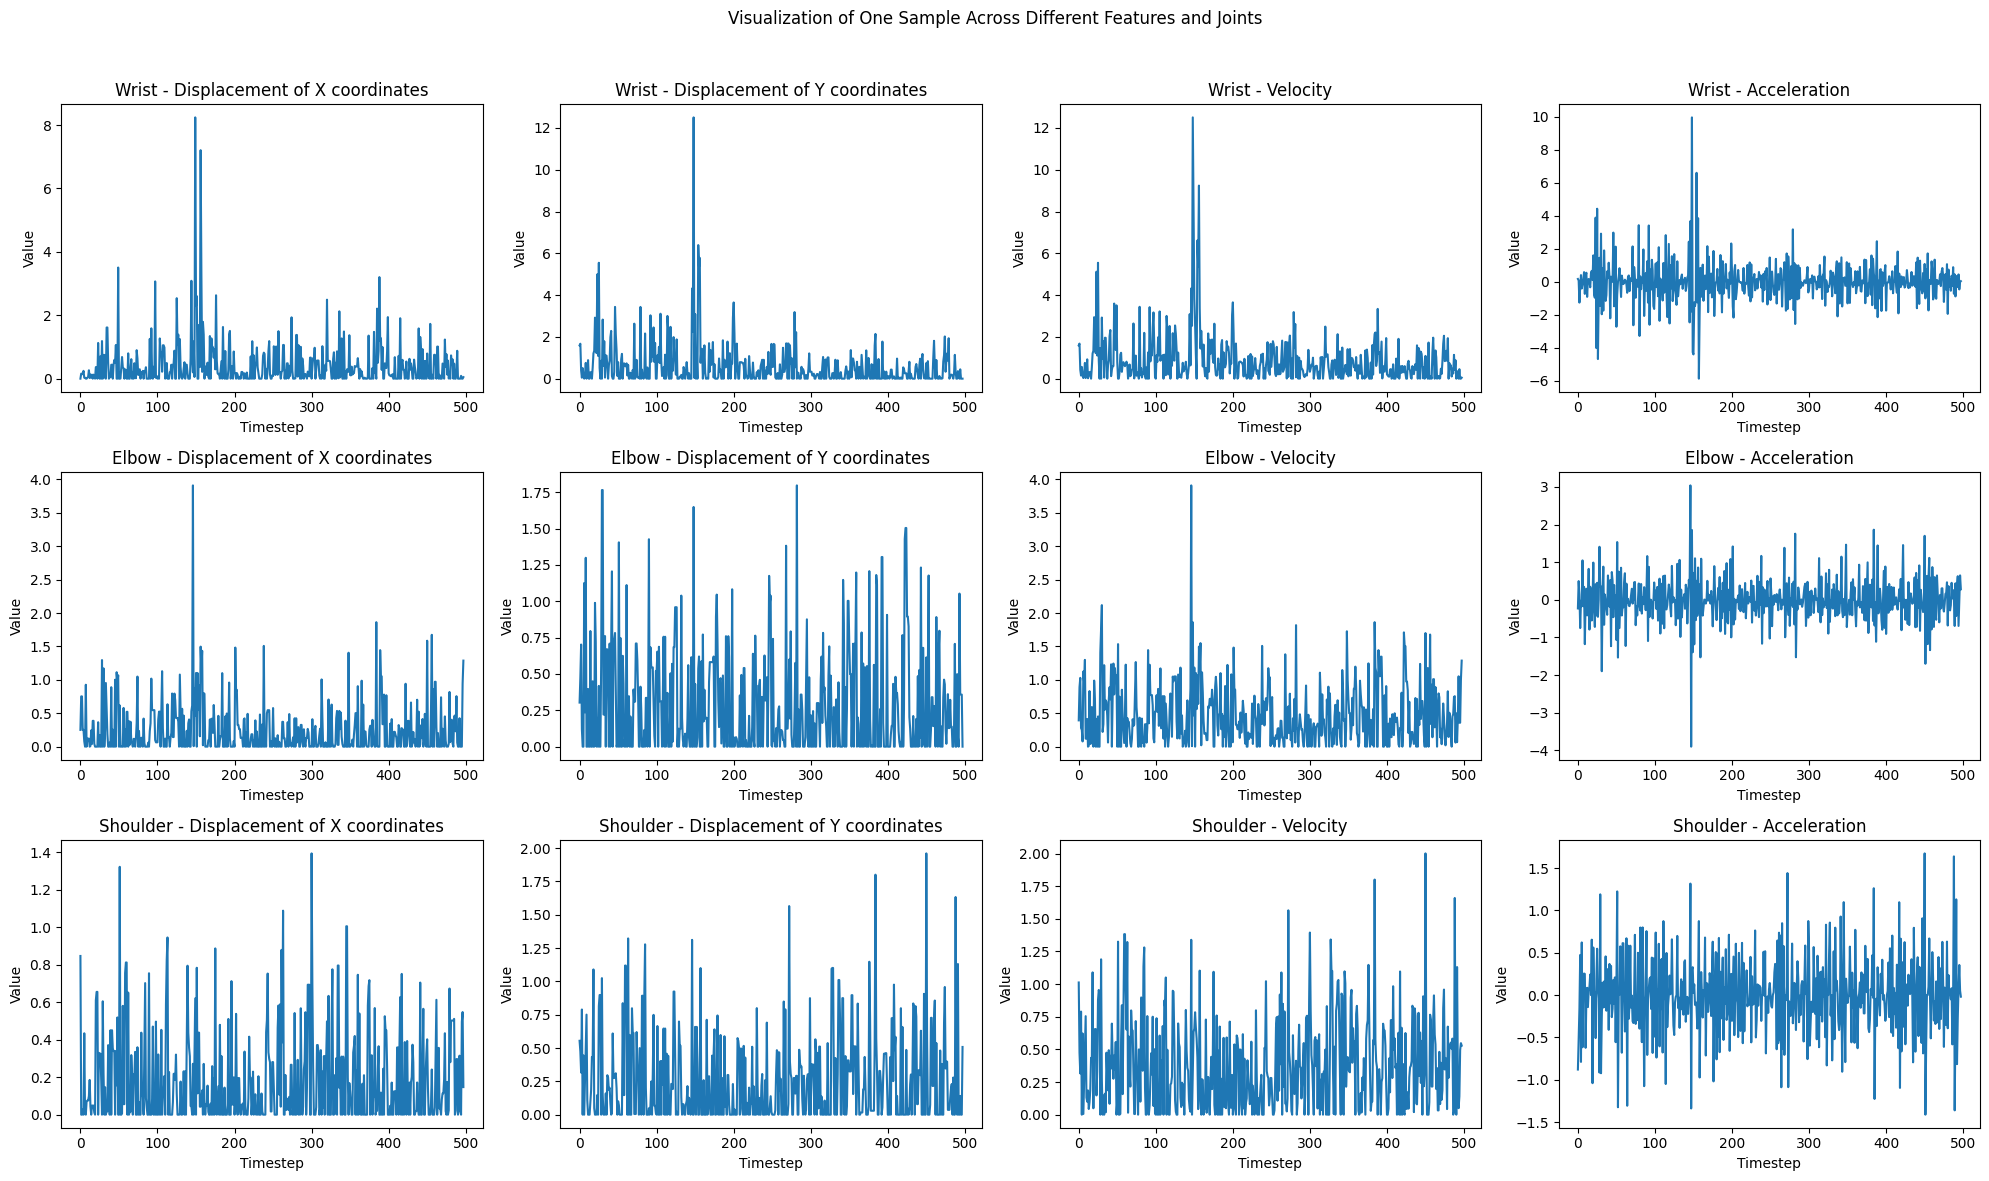

In [44]:
# Select one sample
sample_index = 20
sample = my_data[sample_index]

# Plot each feature for each joint
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Visualization of One Sample Across Different Features and Joints')

for joint_idx in range(3):
    if joint_idx == 0:
          a = 'Wrist'
    elif joint_idx == 1:
          a = 'Elbow'
    elif joint_idx == 2:
          a = 'Shoulder'
    for feature_idx in range(4):

        if feature_idx == 0:
          b = 'Displacement of X coordinates'
        elif feature_idx == 1:
          b = 'Displacement of Y coordinates'
        elif feature_idx == 2:
          b = 'Velocity'
        elif feature_idx == 3:
          b = 'Acceleration'
        ax = axes[joint_idx, feature_idx]
        ax.plot(sample[:, joint_idx, feature_idx])

        ax.set_title(f'{a} - {b}')
        ax.set_xlabel('Timestep')
        ax.set_ylabel('Value')

print(my_label[sample_index])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [70]:
import numpy as np

def mixup_pair(sample_a, sample_b , alpha = 0.6):

    """
    Apply mixup between two specified classes.

    Parameters:
    - X: numpy array, input data of shape (n_samples, timesteps, n_joints, n_features)
    - y: numpy array, labels of shape (n_samples, n_classes)
    - indices_a: list, indices of samples from class A
    - indices_b: list, indices of samples from class B
    - alpha: float, parameter for the Beta distribution (default is 0.6)
    - num_samples: int, number of mixed samples to generate (default is 1)

    Returns:
    - X_mix: numpy array, mixed data of shape (num_samples, timesteps, n_joints, n_features)
    - y_mix: numpy array, mixed labels of shape (num_samples, n_classes)
    """
    if alpha <= 0:
        return sample_a

    # Sample lambda from Beta distribution
    lam = np.random.beta(alpha, alpha, 1)

    # Get the original samples
    # X_a, y_a = X[index_a], y[index_a]
    # X_b, y_b = X[index_b], y[index_b]

    # Generate the mixed sample
    X_mix = lam[:, np.newaxis, np.newaxis, np.newaxis] * sample_a + (1 - lam[:, np.newaxis, np.newaxis, np.newaxis]) * sample_b
    # y_mix = lam * y_a + (1 - lam) * y_b

    return X_mix


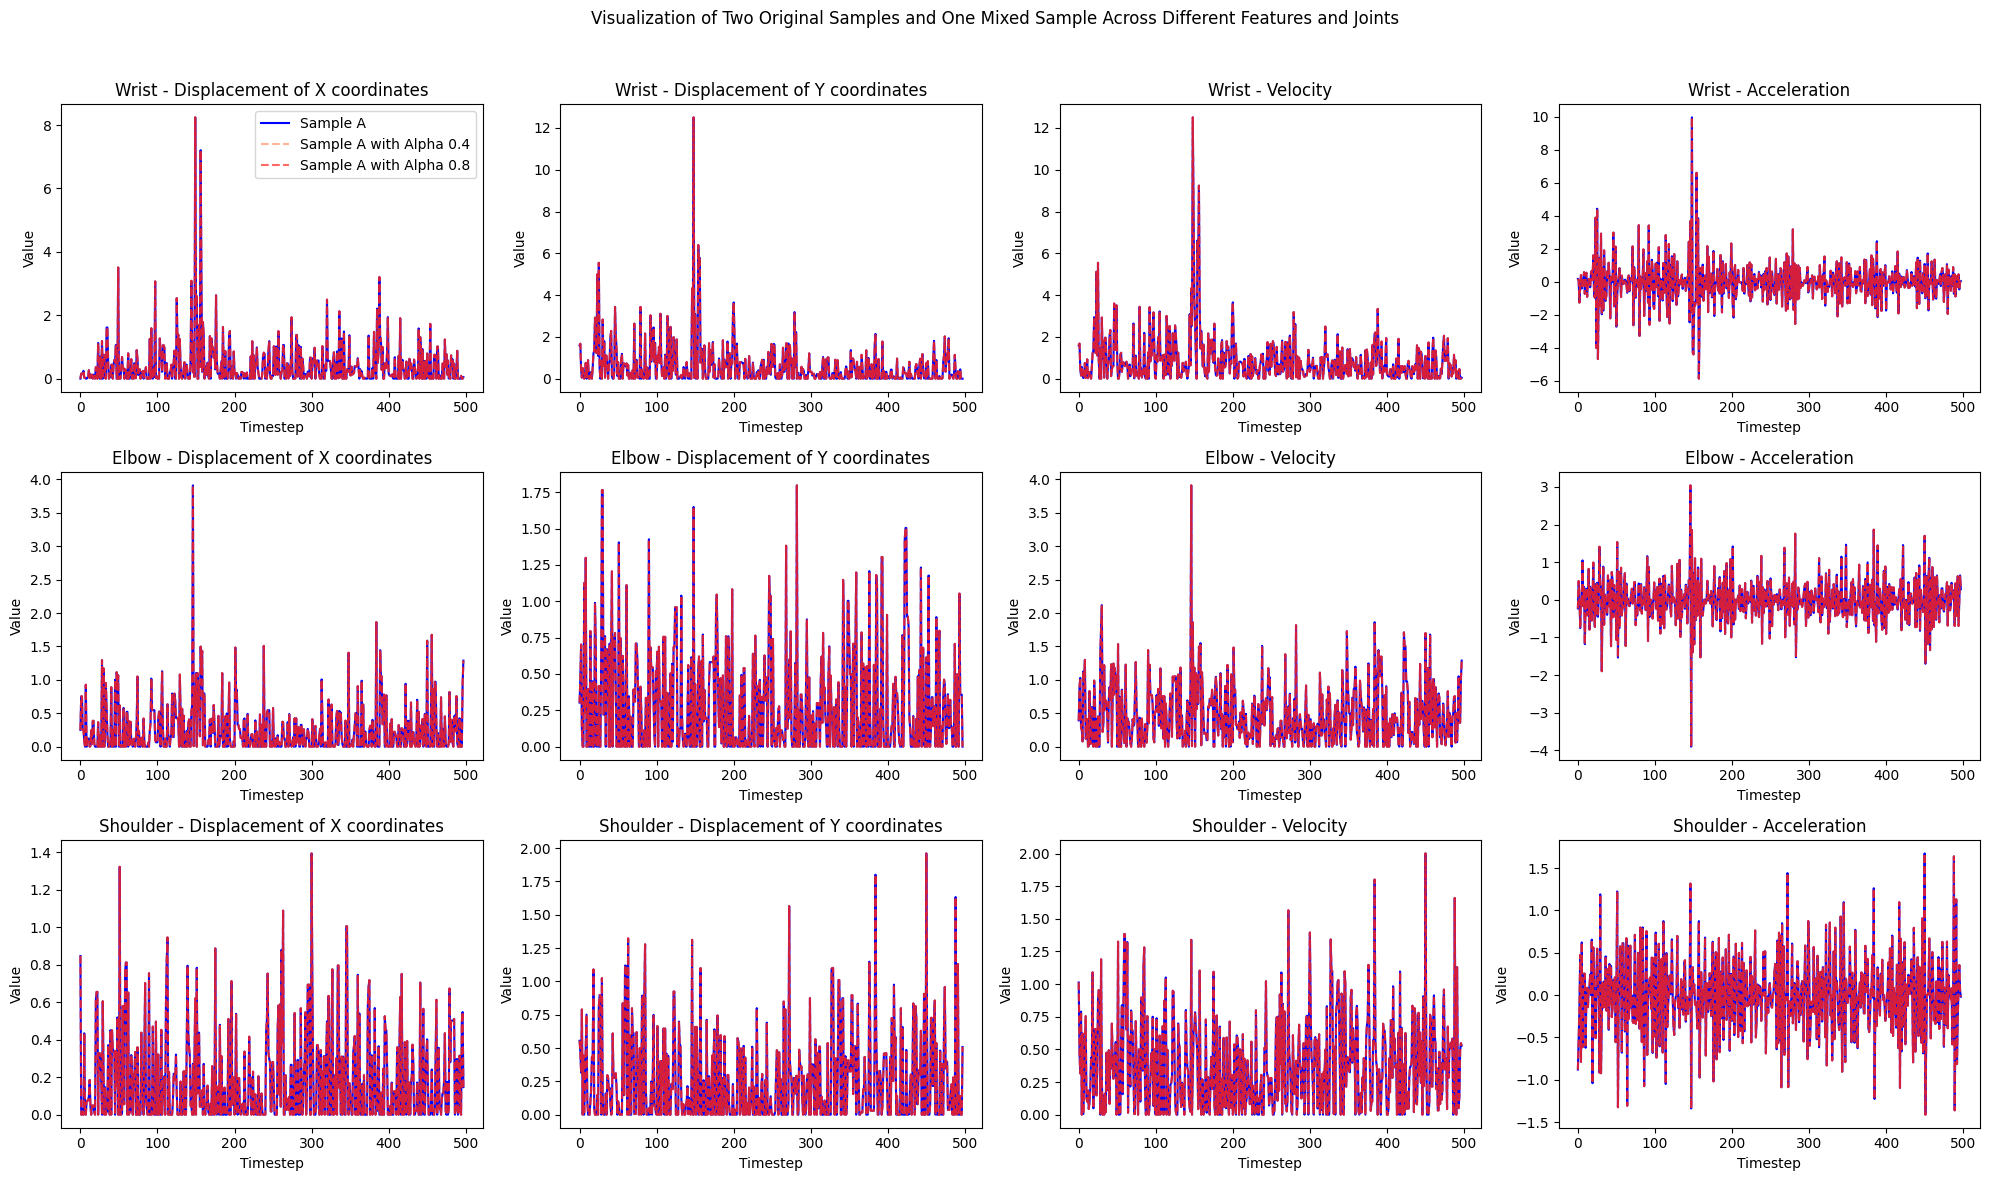

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Select two samples

sample_a = my_data[20].numpy()
sample_b = my_data[7].numpy()


# Generate mixed data using the mixup_pair function
X_mix = mixup_pair(sample_a,sample_a,0.4)
X_mix1 = mixup_pair(sample_a,sample_a,0.8)


# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Visualization of Two Original Samples and One Mixed Sample Across Different Features and Joints')

# Iterate over joints and features
for joint_idx in range(3):
    if joint_idx == 0:
        joint_name = 'Wrist'
    elif joint_idx == 1:
        joint_name = 'Elbow'
    elif joint_idx == 2:
        joint_name = 'Shoulder'

    for feature_idx in range(4):
        if feature_idx == 0:
            feature_name = 'Displacement of X coordinates'
        elif feature_idx == 1:
            feature_name = 'Displacement of Y coordinates'
        elif feature_idx == 2:
            feature_name = 'Velocity'
        elif feature_idx == 3:
            feature_name = 'Acceleration'

        ax = axes[joint_idx, feature_idx]

        # Plot the original sample A
        ax.plot(sample_a[:, joint_idx, feature_idx], label='Sample A', color='blue' ,  alpha = 1.0)

        # Plot the original sample B
        ax.plot(X_mix[0,:, joint_idx, feature_idx], label='Sample A with Alpha 0.4', linestyle='--',color='coral' , alpha = 0.6)

        # Plot the mixed sample
        ax.plot(X_mix1[0, :, joint_idx, feature_idx], label='Sample A with Alpha 0.8',linestyle='--',color='red' , alpha = 0.6)

        # Set title and labels
        ax.set_title(f'{joint_name} - {feature_name}')
        ax.set_xlabel('Timestep')
        ax.set_ylabel('Value')

        # Add legend only for the first subplot
        if joint_idx == 0 and feature_idx == 0:
            ax.legend()

# Print the labels for the original samples and mixed sample
# print(f'Original Sample A Label: {my_label[sample_a]}')
# print(f'Original Sample B Label: {my_label[sample_b]}')
# print(f'Mixed Sample Label: )

# Adjust layout and display plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [45]:
!pip list | grep seaborn

seaborn                          0.13.1


# GCN_TCN/ TCN

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Define a TCN Block
class TCNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation):
        super(TCNBlock, self).__init__()

        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.relu = nn.LeakyReLU(0.01)

        if in_channels != out_channels:
            self.residual_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        else:
            self.residual_conv = None

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        if self.residual_conv is not None:
            residual = self.residual_conv(residual)

        x = x + residual  # Residual connection
        x = x.permute(0, 2, 1)  # Permute to shape [batch_size, sequence_length, num_channels]

        x = x.permute(0, 2, 1)  # Permute back to shape [batch_size, num_channels, sequence_length]
        return self.relu(x)

# Define the TCN Model
class GCN_TCN(nn.Module):
    def __init__(self):
        super(GCN_TCN, self).__init__()

        self.gcn = GCN(4, 16, 8)
        self.tcn_block1 = TCNBlock(8, 16, kernel_size=5, dilation=4)
        self.fc1 = nn.Linear(4 * 3 * 16, 5)


    def forward(self, x):
        # x: (batch_size, num_joints, num_frames, input_dim)
        x = x.permute(0, 2, 3, 1) # [batch_size, num_features, num_joints, num_frames]
        data_list = []
        x = torch.split(x, 1, dim=3)

        for i in range(len(x)):
            temp_x = torch.tensor(x[i])
            temp_x = temp_x.squeeze(-1)
            edge_index = torch.tensor([
                [0, 1,],
                [1, 2,]
            ], dtype=torch.long)

            data = Data(x = temp_x, edge_index = edge_index).to(device)
            data_list.append(data)

        gcn_outs = []
        for data in data_list:
            gcn_out = self.gcn(data)
            gcn_outs.append(gcn_out)

        gcn_outs = torch.stack(gcn_outs, dim=3) #torch.Size([16, 3, 4, 498])
        x = gcn_outs.permute(0, 2, 1, 3)  # [batch_size, num_features, num_joints, num_frames]
        x = torch.split(x, 1, dim=2)
        x1, x2, x3 = [t.squeeze(dim=2) for t in x]

        x1 = self.tcn_block1(x1)
        x2 = self.tcn_block1(x2)
        x3 = self.tcn_block1(x3)

        x1 = F.adaptive_avg_pool2d(x1, (4, 16))
        x2 = F.adaptive_avg_pool2d(x2, (4, 16))
        x3 = F.adaptive_avg_pool2d(x3, (4, 16))

        x = torch.stack((x1, x2, x3), dim=1)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        return x

In [68]:
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

model = GCN_TCN()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(10):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        scheduler.step(loss)

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 1: Training Loss = 1.5340, Training Accuracy = 0.2634
Epoch 1: Validation Loss = 1.6068, Validation Accuracy = 0.3333


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 2: Training Loss = 1.2066, Training Accuracy = 0.4390
Epoch 2: Validation Loss = 3.1437, Validation Accuracy = 0.3333


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 3: Training Loss = 1.0418, Training Accuracy = 0.5707
Epoch 3: Validation Loss = 3.2790, Validation Accuracy = 0.4815


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 4: Training Loss = 0.8839, Training Accuracy = 0.6098
Epoch 4: Validation Loss = 2.6810, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 5: Training Loss = 0.8206, Training Accuracy = 0.7122
Epoch 5: Validation Loss = 2.9426, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 6: Training Loss = 0.7925, Training Accuracy = 0.7317
Epoch 6: Validation Loss = 3.0874, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 7: Training Loss = 0.7877, Training Accuracy = 0.7171
Epoch 7: Validation Loss = 3.1063, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 8: Training Loss = 0.7853, Training Accuracy = 0.7171
Epoch 8: Validation Loss = 3.0985, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 9: Training Loss = 0.7839, Training Accuracy = 0.7220
Epoch 9: Validation Loss = 3.0909, Validation Accuracy = 0.5556


<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 10: Training Loss = 0.7834, Training Accuracy = 0.7220
Epoch 10: Validation Loss = 3.0892, Validation Accuracy = 0.5556


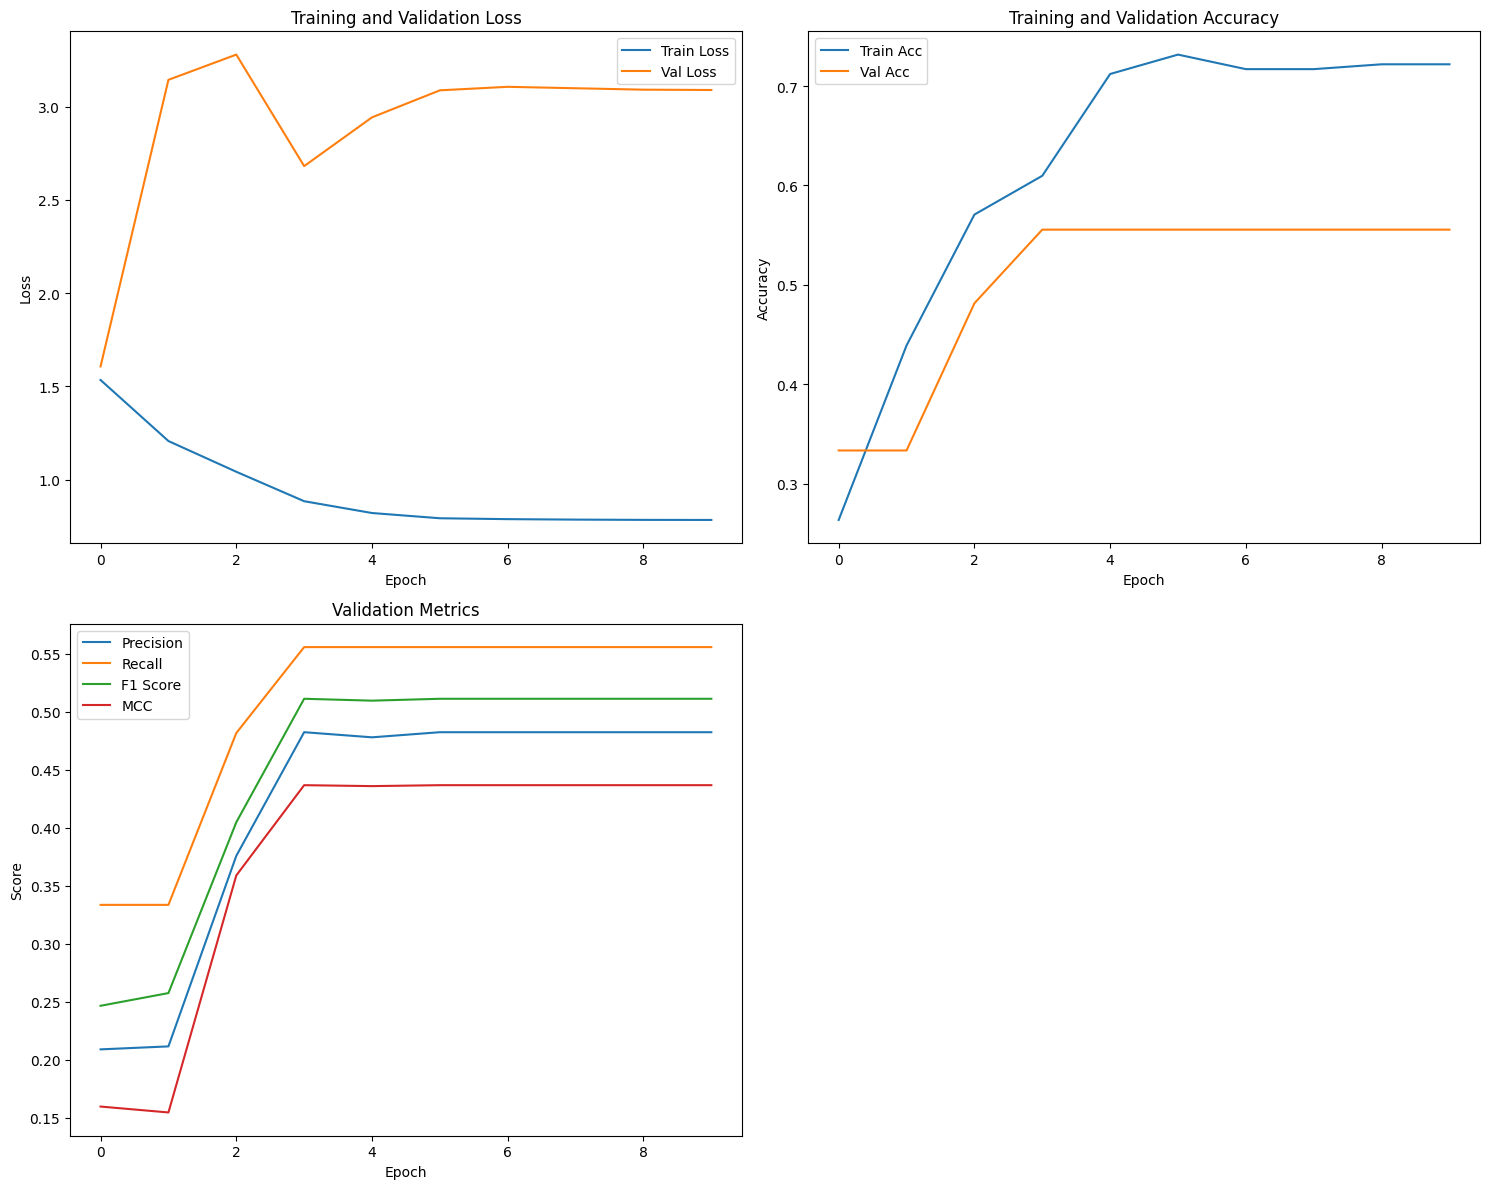

In [70]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [71]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

3.089193820953369
0.5555555555555556
0.5555555555555556
0.4821869488536155
0.511007511007511
0.4365197462287172


In [72]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

<ipython-input-64-8a50f68b9155>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


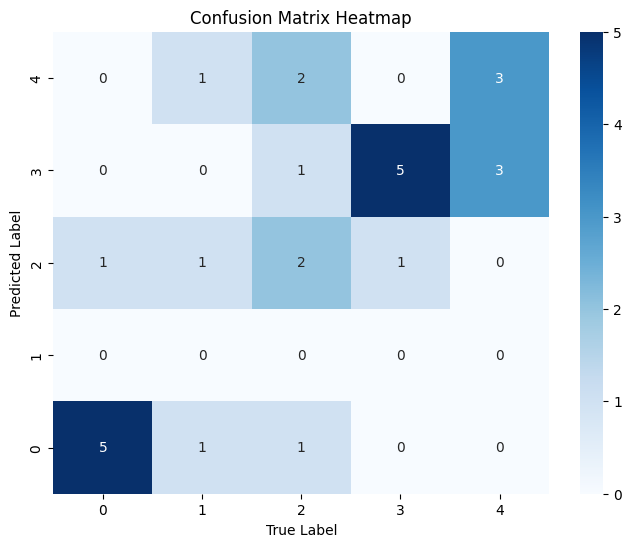

In [73]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

TCN(without GCN)

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Define a TCN Block
class TCNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation):
        super(TCNBlock, self).__init__()

        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.relu = nn.LeakyReLU(0.01)
        self.layer_norm = nn.LayerNorm(out_channels)  # Normalizing over the channels

        if in_channels != out_channels:
            self.residual_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        else:
            self.residual_conv = None

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        if self.residual_conv is not None:
            residual = self.residual_conv(residual)

        x = x + residual  # Residual connection
        x = x.permute(0, 2, 1)  # Permute to shape [batch_size, sequence_length, num_channels]

        # x = self.layer_norm(x)
        x = x.permute(0, 2, 1)  # Permute back to shape [batch_size, num_channels, sequence_length]
        return self.relu(x)

# Define the TCN Model
class TCN(nn.Module):
    def __init__(self):
        super(TCN, self).__init__()

        self.tcn_block1 = TCNBlock(4, 16, kernel_size=5, dilation=4)
        self.fc1 = nn.Linear(4 * 16 *3 , 5)

    def forward(self, x):
        # x: (batch_size, num_joints, num_frames, input_dim)
        x = x.permute(0, 3, 2, 1)
        x = torch.split(x, 1, dim=2)
        x1, x2, x3 = [t.squeeze(dim=2) for t in x]

        x_1 = self.tcn_block1(x3)
        x_2 = self.tcn_block1(x3)
        x_3 = self.tcn_block1(x3)

        # print(x1.shape)
        x1 = F.adaptive_avg_pool2d(x_1, (4, 16))
        x2 = F.adaptive_avg_pool2d(x_2, (4, 16))
        x3 = F.adaptive_avg_pool2d(x_3, (4, 16))


        x = torch.stack((x1, x2, x3), dim=1)
        # x = torch.stack((x1), dim=1)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)

        return x

In [95]:
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef


model = TCN()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(20):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # scheduler.step(loss)

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


Epoch 1: Training Loss = 1.6015, Training Accuracy = 0.2049
Epoch 1: Validation Loss = 1.5887, Validation Accuracy = 0.1852
Epoch 2: Training Loss = 1.5616, Training Accuracy = 0.2146
Epoch 2: Validation Loss = 1.5831, Validation Accuracy = 0.2222
Epoch 3: Training Loss = 1.5439, Training Accuracy = 0.2195
Epoch 3: Validation Loss = 1.5786, Validation Accuracy = 0.2222
Epoch 4: Training Loss = 1.5173, Training Accuracy = 0.2488
Epoch 4: Validation Loss = 1.5742, Validation Accuracy = 0.2222
Epoch 5: Training Loss = 1.4825, Training Accuracy = 0.2829
Epoch 5: Validation Loss = 1.5693, Validation Accuracy = 0.2222
Epoch 6: Training Loss = 1.4332, Training Accuracy = 0.2927
Epoch 6: Validation Loss = 1.5652, Validation Accuracy = 0.2222
Epoch 7: Training Loss = 1.3943, Training Accuracy = 0.2829
Epoch 7: Validation Loss = 1.5657, Validation Accuracy = 0.2963
Epoch 8: Training Loss = 1.3607, Training Accuracy = 0.3268
Epoch 8: Validation Loss = 1.5786, Validation Accuracy = 0.1852
Epoch 9:

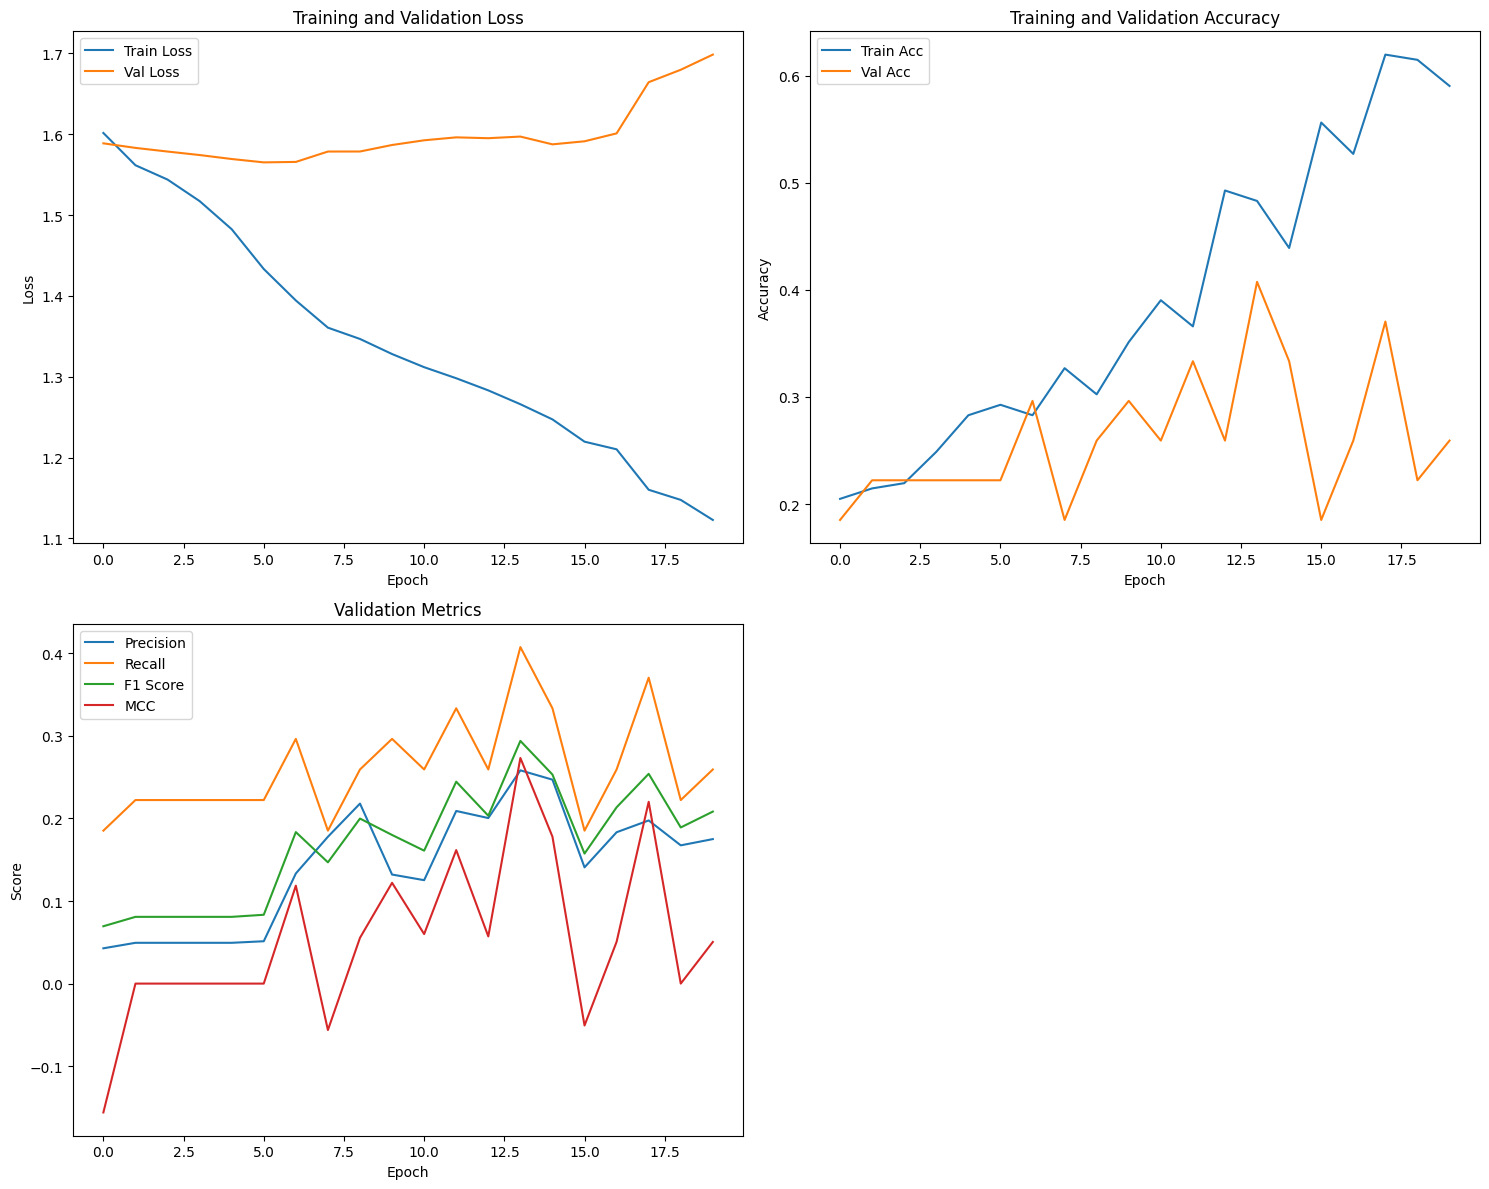

In [96]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [97]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

1.6984975337982178
0.25925925925925924
0.25925925925925924
0.17495590828924162
0.20826210826210825
0.050412455431674844


In [98]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

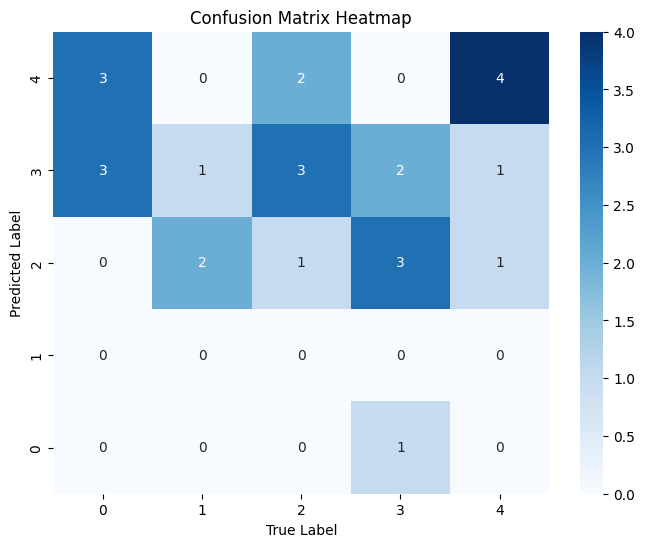

In [99]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

TCN(ONLY TEMPORAL)

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Define the TCN Model
class TCN_TEMPORAL(nn.Module):
    def __init__(self, input_channels, out_channels):
        super(TCN_TEMPORAL, self).__init__()

        self.conv2d = nn.Conv2d(4, 8, kernel_size = (3,1))

        self.tcn1 = nn.Conv1d(input_channels, out_channels, kernel_size=3, dilation=1)  # 연속된 시간
        self.tcn2 = nn.Conv1d(input_channels, out_channels, kernel_size=5, dilation=2)  # 더 넓은 시간 범위
        self.tcn3 = nn.Conv1d(input_channels, out_channels, kernel_size=10, dilation=4)  # 더 넓은 시간 범위
        self.tcn4 = nn.Conv1d(input_channels, out_channels, kernel_size=20, dilation=4)  # 연속된 시간
        self.tcn5 = nn.Conv1d(input_channels, out_channels, kernel_size=25, dilation=4)  # 더 넓은 시간 범위

        self.pool = nn.AdaptiveAvgPool1d(7)
        self.fc1 = nn.Linear(16 * 7,  5)
        self.dropout = nn.Dropout(0.02)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, x):
        # shape: batch_sinze, num_frames, joints, features

        # x = x.permute(0,3,2,1)
        # x = self.conv2d(x) #batch_size, out_channels, 1, time_frames
        # x = self.relu(x)
        # x = x.squeeze(2)

        x = x.permute(0, 3, 2, 1)
        x = torch.split(x, 1, dim=2)
        x_1, x_2, x_3 = [t.squeeze(dim=2) for t in x]

        x1 = F.relu(self.tcn1(x_3))
        x2 = F.relu(self.tcn2(x_3))
        x3 = F.relu(self.tcn3(x_3))
        x4 = F.relu(self.tcn4(x_3))
        x5 = F.relu(self.tcn5(x_3))


        x1 = self.dropout(x1)
        x2 = self.dropout(x2)
        x3 = self.dropout(x3)
        x4 = self.dropout(x4)
        x5 = self.dropout(x5)



        x1 = self.pool(x1)
        x2 = self.pool(x2)
        x3 = self.pool(x3)
        x4 = self.pool(x4)
        x5 = self.pool(x5)



        x = x1 + x2 + x3 + x4 + x5
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)

        return x

In [124]:
import torch.optim as optim


model = TCN_TEMPORAL(4, 16)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(25):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # scheduler.step(loss)

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")

Epoch 1: Training Loss = 1.5850, Training Accuracy = 0.2439
Epoch 1: Validation Loss = 1.5668, Validation Accuracy = 0.2593
Epoch 2: Training Loss = 1.4952, Training Accuracy = 0.2439
Epoch 2: Validation Loss = 1.5588, Validation Accuracy = 0.1481
Epoch 3: Training Loss = 1.4407, Training Accuracy = 0.3171
Epoch 3: Validation Loss = 1.5636, Validation Accuracy = 0.2222
Epoch 4: Training Loss = 1.3976, Training Accuracy = 0.3317
Epoch 4: Validation Loss = 1.5559, Validation Accuracy = 0.2222
Epoch 5: Training Loss = 1.3662, Training Accuracy = 0.3220
Epoch 5: Validation Loss = 1.5555, Validation Accuracy = 0.2593
Epoch 6: Training Loss = 1.3431, Training Accuracy = 0.3122
Epoch 6: Validation Loss = 1.5672, Validation Accuracy = 0.2222
Epoch 7: Training Loss = 1.3237, Training Accuracy = 0.3659
Epoch 7: Validation Loss = 1.5675, Validation Accuracy = 0.4074
Epoch 8: Training Loss = 1.3098, Training Accuracy = 0.4195
Epoch 8: Validation Loss = 1.5735, Validation Accuracy = 0.2593
Epoch 9:

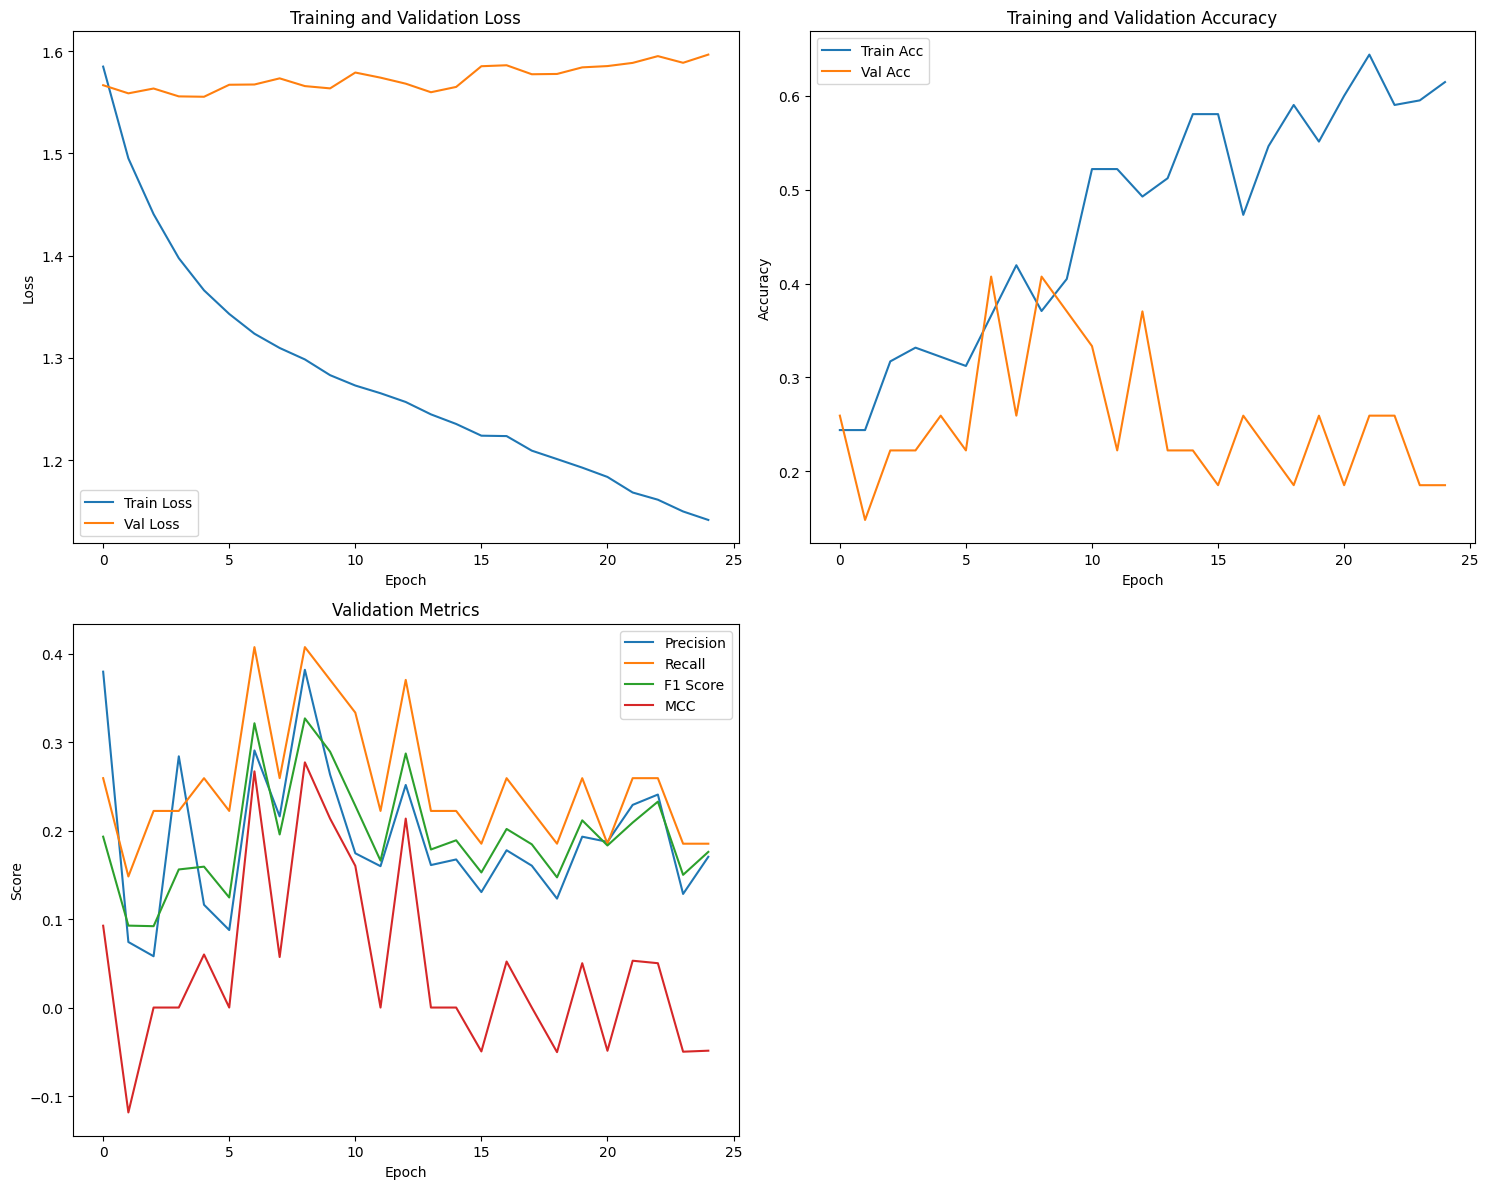

In [125]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [126]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

1.59672212600708
0.18518518518518517
0.18518518518518517
0.17037037037037037
0.17592592592592593
-0.04877493578573175


In [127]:
all_preds = []
all_targets = []

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

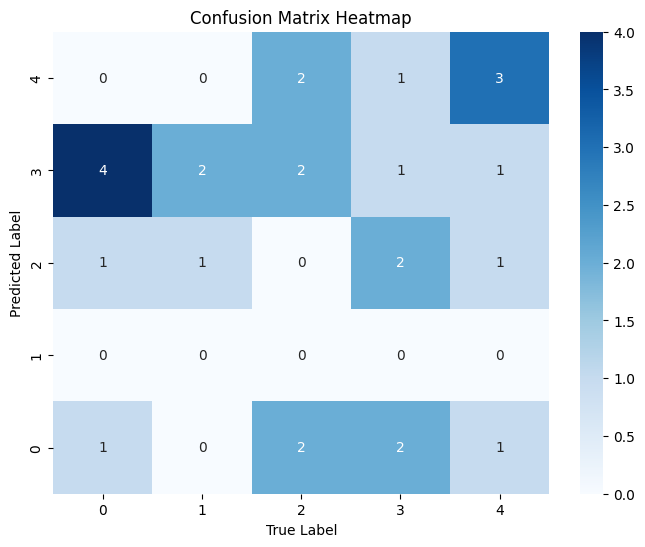

In [128]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

# GCN_LSTM

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Define the TCN Model
class GCN_LSTM(nn.Module):
    def __init__(self):
        super(GCN_LSTM, self).__init__()

        self.conv2d = nn.Conv2d(8, 16, kernel_size = (3,1))

        self.pool = nn.AdaptiveAvgPool1d(8)
        self.fc1 = nn.Linear(64*8, 5)
        self.relu = nn.LeakyReLU(0.01)
        self.gcn = GCN(4, 16, 8)

        self.lstm = nn.LSTM(input_size=16, hidden_size=64, num_layers=2, batch_first=True, dropout=0.1)

        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        # shape: batch_sinze, num_frames, joints, features

        x = x.permute(0, 2, 3, 1) # [batch_size, num_features, num_joints, num_frames]
        data_list = []
        x = torch.split(x, 1, dim=3)

        for i in range(len(x)):
            temp_x = torch.tensor(x[i])
            temp_x = temp_x.squeeze(-1)
            edge_index = torch.tensor([
                [0, 1,],
                [1, 2,]
            ], dtype=torch.long)

            data = Data(x = temp_x, edge_index = edge_index).to(device)
            data_list.append(data)

        gcn_outs = []
        for data in data_list:
            gcn_out = self.gcn(data)
            gcn_outs.append(gcn_out)

        gcn_outs = torch.stack(gcn_outs, dim=3) #torch.Size([16, 3, 4, 498])
        x = gcn_outs.permute(0, 2, 1, 3)  # [batch_size, num_features, num_joints, num_frames]

        # x = x.permute(0,3,2,1)
        x = self.conv2d(x) #batch_size, out_channels, 1, time_frames
        x = self.dropout(x)
        x = x.squeeze(2)
        x = x.permute(0, 2, 1)
        x,_ = self.lstm(x)

        x = x.permute(0, 2, 1)
        x = self.pool(x)

        x = x.reshape(x.size(0), -1)

        x = self.fc1(x)

        return x

In [130]:
import torch.optim as optim


model = GCN_LSTM()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(10):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 1: Training Loss = 1.6243, Training Accuracy = 0.2146
Epoch 1: Validation Loss = 1.5582, Validation Accuracy = 0.4074


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 2: Training Loss = 1.4849, Training Accuracy = 0.3610
Epoch 2: Validation Loss = 1.4641, Validation Accuracy = 0.4074


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 3: Training Loss = 1.1683, Training Accuracy = 0.5171
Epoch 3: Validation Loss = 1.4915, Validation Accuracy = 0.4815


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 4: Training Loss = 1.0943, Training Accuracy = 0.5756
Epoch 4: Validation Loss = 1.5243, Validation Accuracy = 0.4444


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 5: Training Loss = 1.0540, Training Accuracy = 0.5756
Epoch 5: Validation Loss = 1.4589, Validation Accuracy = 0.4074


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 6: Training Loss = 1.0773, Training Accuracy = 0.5854
Epoch 6: Validation Loss = 1.3098, Validation Accuracy = 0.4815


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 7: Training Loss = 1.0416, Training Accuracy = 0.6146
Epoch 7: Validation Loss = 1.4645, Validation Accuracy = 0.4815


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 8: Training Loss = 1.0214, Training Accuracy = 0.6146
Epoch 8: Validation Loss = 1.3152, Validation Accuracy = 0.4815


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 9: Training Loss = 1.0839, Training Accuracy = 0.5366
Epoch 9: Validation Loss = 1.5430, Validation Accuracy = 0.5185


<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


Epoch 10: Training Loss = 1.1936, Training Accuracy = 0.4976
Epoch 10: Validation Loss = 1.3528, Validation Accuracy = 0.5926


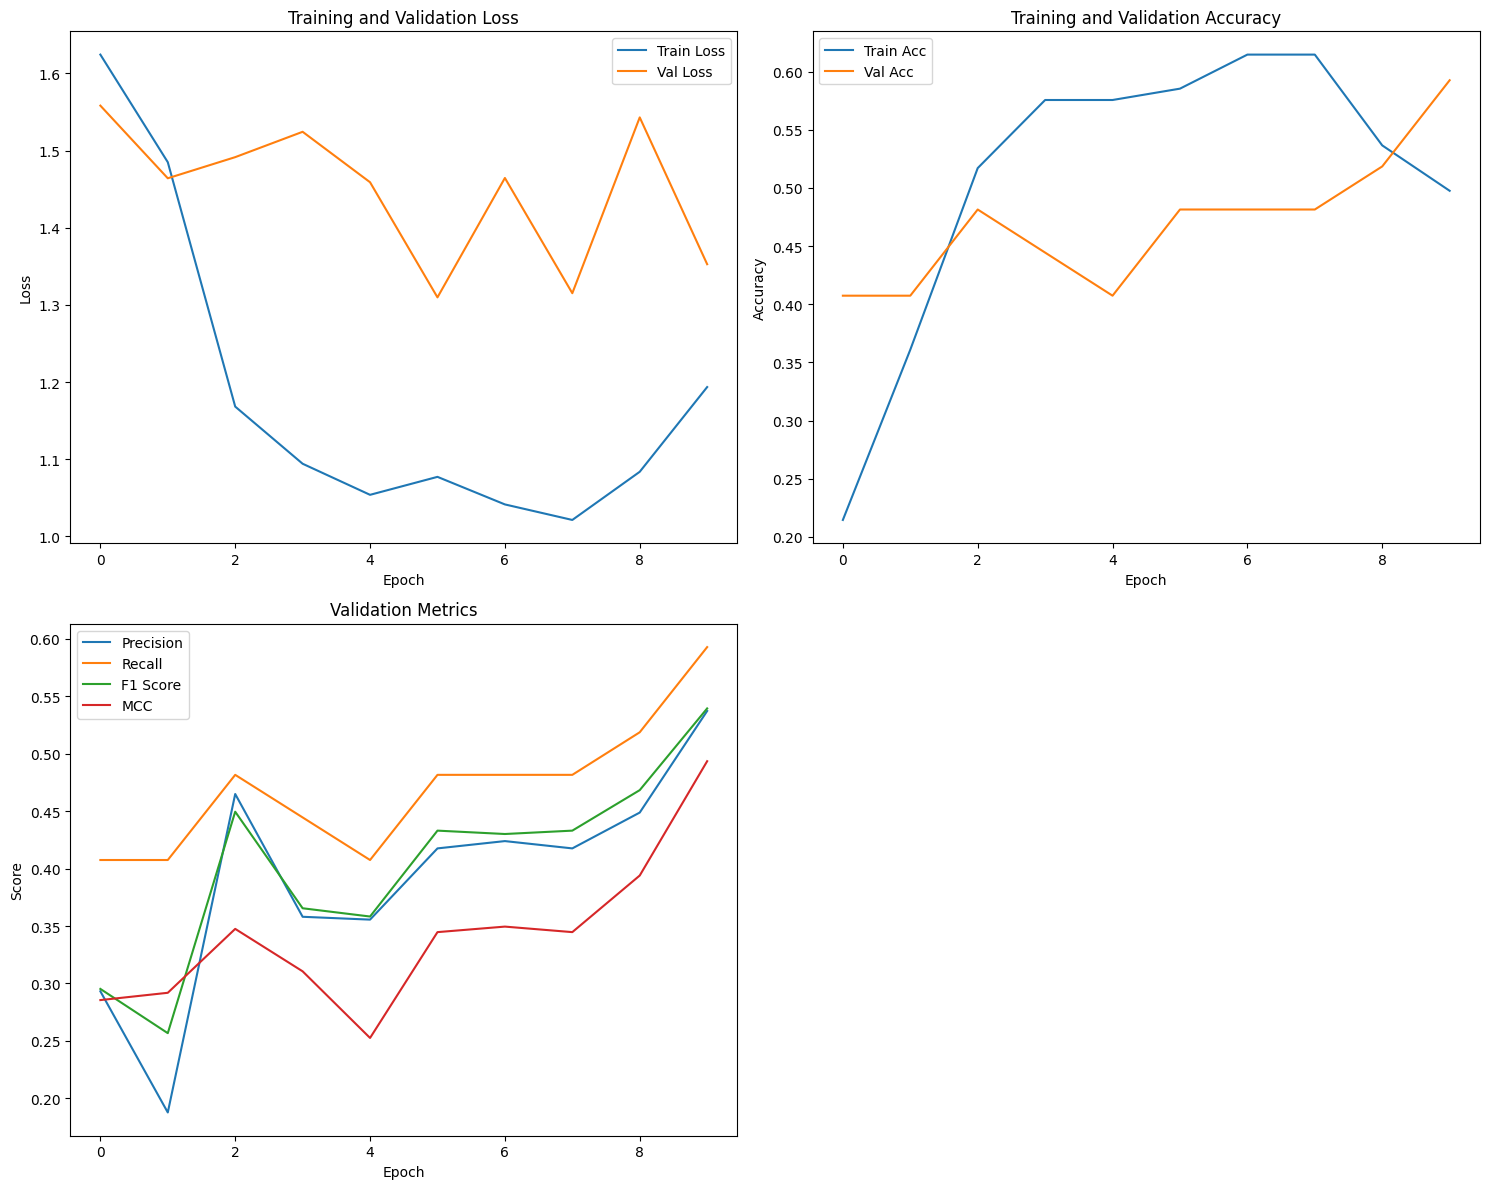

In [131]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [132]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

1.352763295173645
0.5925925925925926
0.5925925925925926
0.5370370370370371
0.5392416225749559
0.4933451358602039


In [135]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

<ipython-input-129-23908e8af5c7>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_x = torch.tensor(x[i])


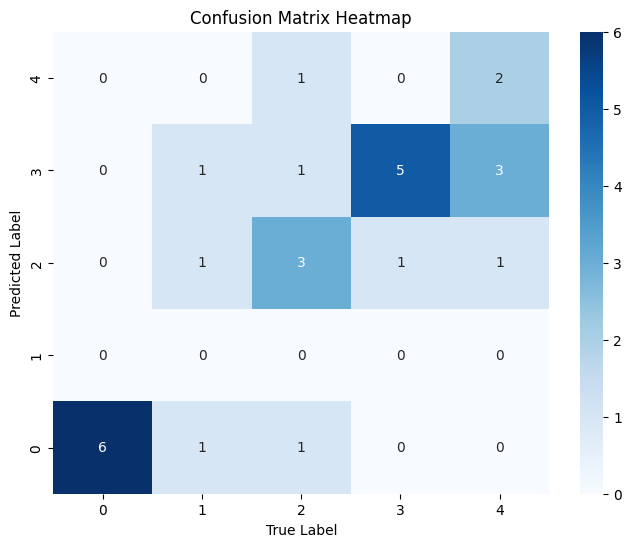

In [136]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Define the TCN Model
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()

        self.conv2d = nn.Conv2d(4, 16, kernel_size = (3,1))

        self.pool = nn.AdaptiveAvgPool1d(8)
        self.fc1 = nn.Linear(64*8, 5)
        self.relu = nn.LeakyReLU(0.01)

        self.lstm = nn.LSTM(input_size=4, hidden_size=64, num_layers=2, batch_first=True, dropout=0.1)

        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        # shape: batch_sinze, num_frames, joints, features

        # x = x.permute(0,3,2,1)
        # x = self.conv2d(x) #batch_size, out_channels, 1, time_frames
        # x = self.dropout(x)
        # x = x.squeeze(2)

        x = x.permute(0, 3, 2, 1)
        x = torch.split(x, 1, dim=2)
        x_1, x_2, x_3 = [t.squeeze(dim=2) for t in x]

        x = x_3.permute(0, 2, 1)
        x,_ = self.lstm(x)

        x = x.permute(0, 2, 1)
        x = self.pool(x)

        x = x.reshape(x.size(0), -1)

        x = self.fc1(x)

        return x

In [158]:
import torch.optim as optim


model = LSTM()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(15):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


Epoch 1: Training Loss = 1.6058, Training Accuracy = 0.1902
Epoch 1: Validation Loss = 1.5933, Validation Accuracy = 0.2222
Epoch 2: Training Loss = 1.5914, Training Accuracy = 0.2098
Epoch 2: Validation Loss = 1.5858, Validation Accuracy = 0.2593
Epoch 3: Training Loss = 1.5860, Training Accuracy = 0.2098
Epoch 3: Validation Loss = 1.5823, Validation Accuracy = 0.2222
Epoch 4: Training Loss = 1.5828, Training Accuracy = 0.2195
Epoch 4: Validation Loss = 1.5805, Validation Accuracy = 0.2593
Epoch 5: Training Loss = 1.5810, Training Accuracy = 0.2244
Epoch 5: Validation Loss = 1.5794, Validation Accuracy = 0.2222
Epoch 6: Training Loss = 1.5761, Training Accuracy = 0.2537
Epoch 6: Validation Loss = 1.5788, Validation Accuracy = 0.2222
Epoch 7: Training Loss = 1.5689, Training Accuracy = 0.2244
Epoch 7: Validation Loss = 1.5769, Validation Accuracy = 0.2593
Epoch 8: Training Loss = 1.5541, Training Accuracy = 0.2634
Epoch 8: Validation Loss = 1.5733, Validation Accuracy = 0.2593
Epoch 9:

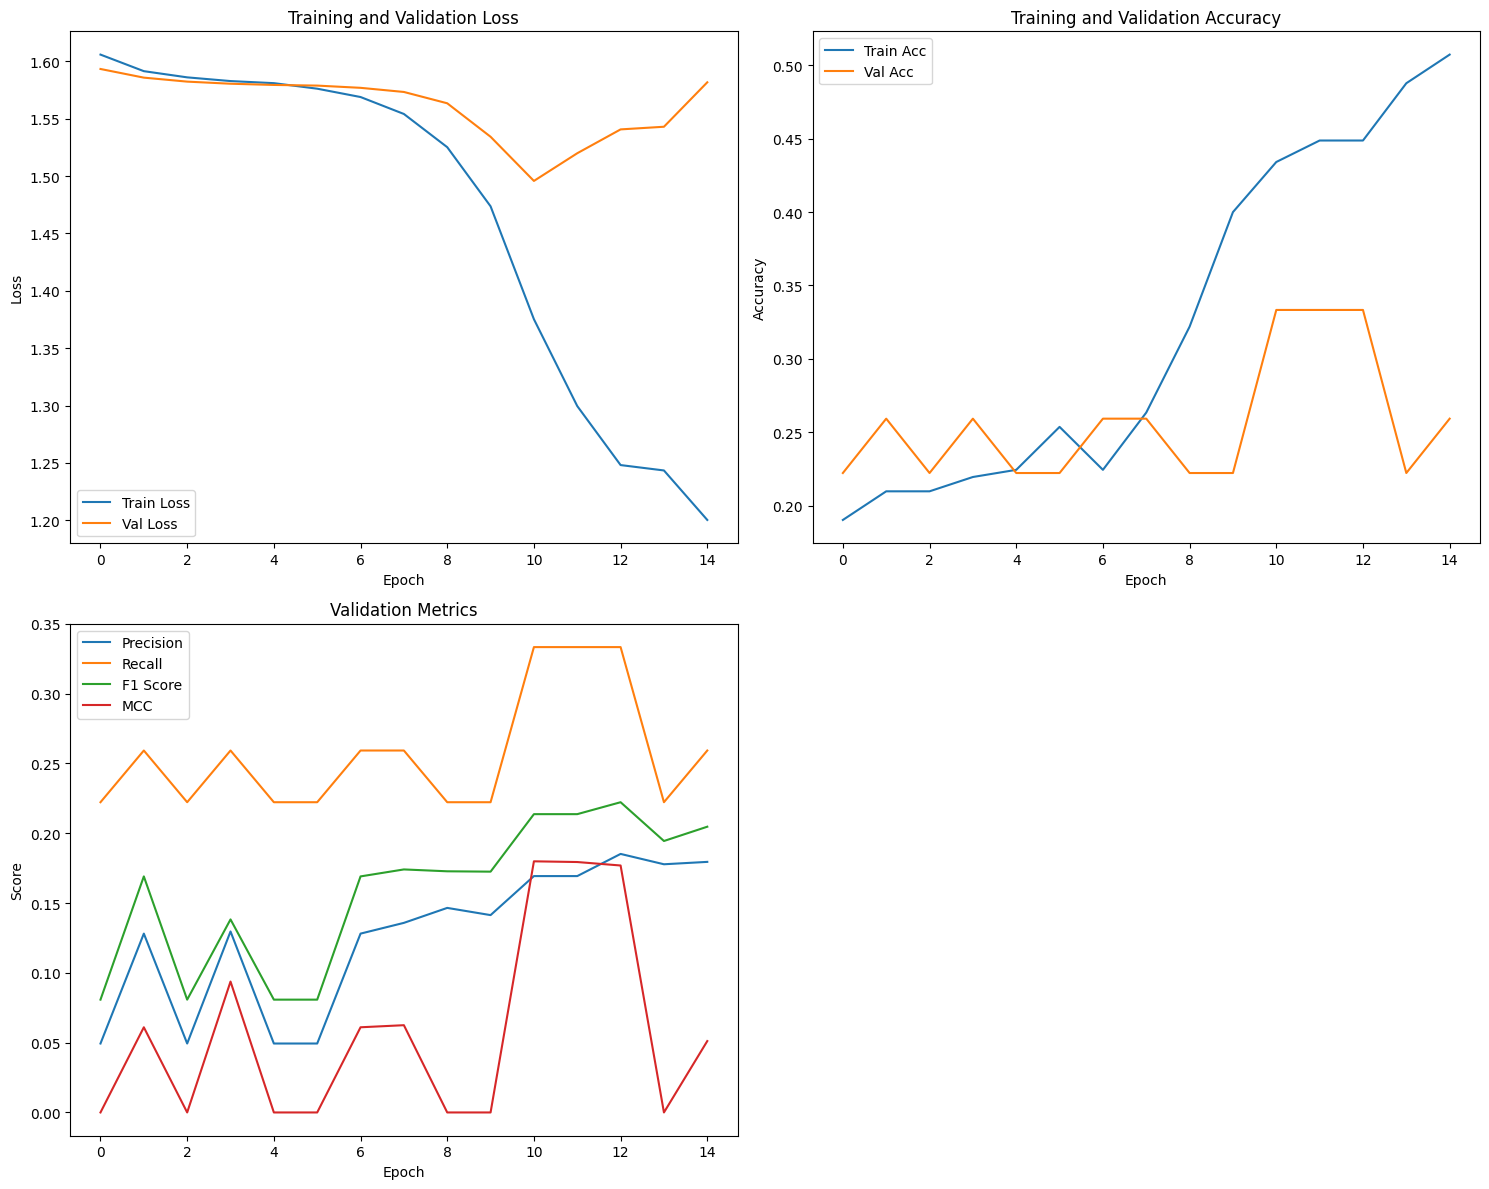

In [159]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [160]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

1.5816960334777832
0.25925925925925924
0.25925925925925924
0.17948717948717952
0.2046783625730994
0.05113636363636364


In [161]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

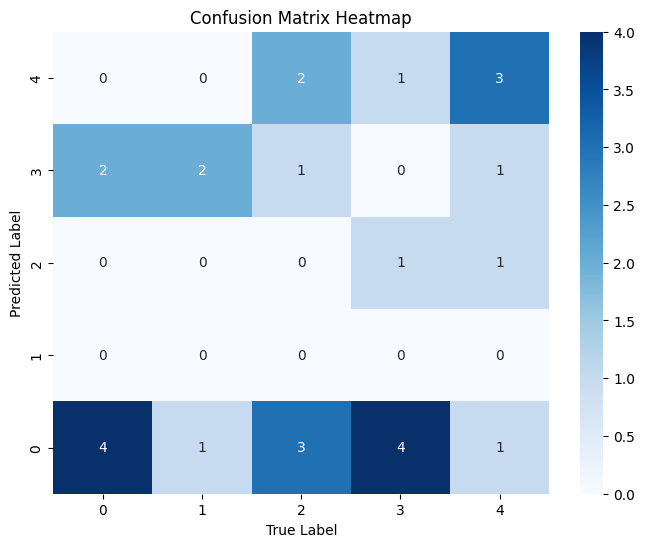

In [162]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

In [165]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x


# Define the TCN Model
class LSTM_TEMP(nn.Module):
    def __init__(self):
        super(LSTM_TEMP, self).__init__()

        self.fc1 = nn.Linear(4 * 3 * 16, 5)
        self.lstm = nn.LSTM(input_size=4, hidden_size=64, num_layers=2, batch_first=True, dropout=0.1)


    def forward(self, x):
        # x: (batch_size, num_joints, num_frames, input_dim)
        x = x.permute(0, 3, 2, 1)

        x = torch.split(x, 1, dim=2)
        x1, x2, x3 = [t.squeeze(dim=2) for t in x]
        x1 = x1.permute(0, 2, 1)

        x1, _ = self.lstm(x1)
        # x2, _ = self.lstm(x2)
        # x3, _ = self.lstm(x3)


        # print(x1.shape)
        x1 = F.adaptive_avg_pool2d(x1, (4, 16))
        x2 = F.adaptive_avg_pool2d(x1, (4, 16))
        x3 = F.adaptive_avg_pool2d(x1, (4, 16))
        # print(x1.shape)

        x = torch.stack((x1, x2, x3), dim=1)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)

        return x

In [166]:
import torch.optim as optim


model = LSTM_TEMP()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(35):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

    print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


Epoch 1: Training Loss = 1.6082, Training Accuracy = 0.2146
Epoch 1: Validation Loss = 1.5970, Validation Accuracy = 0.2593
Epoch 2: Training Loss = 1.5943, Training Accuracy = 0.2488
Epoch 2: Validation Loss = 1.5728, Validation Accuracy = 0.2222
Epoch 3: Training Loss = 1.5754, Training Accuracy = 0.2195
Epoch 3: Validation Loss = 1.5467, Validation Accuracy = 0.2963
Epoch 4: Training Loss = 1.5555, Training Accuracy = 0.2195
Epoch 4: Validation Loss = 1.4990, Validation Accuracy = 0.2222
Epoch 5: Training Loss = 1.4928, Training Accuracy = 0.2341
Epoch 5: Validation Loss = 1.4061, Validation Accuracy = 0.4074
Epoch 6: Training Loss = 1.3820, Training Accuracy = 0.4098
Epoch 6: Validation Loss = 1.3670, Validation Accuracy = 0.3704
Epoch 7: Training Loss = 1.3223, Training Accuracy = 0.4537
Epoch 7: Validation Loss = 1.3512, Validation Accuracy = 0.4074
Epoch 8: Training Loss = 1.2984, Training Accuracy = 0.4585
Epoch 8: Validation Loss = 1.4582, Validation Accuracy = 0.3704
Epoch 9:

In [167]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.LeakyReLU(0.01)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Define a TCN Block
class TCNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation):
        super(TCNBlock, self).__init__()

        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, dilation=dilation, padding='same')
        self.relu = nn.LeakyReLU(0.01)
        self.layer_norm = nn.LayerNorm(out_channels)  # Normalizing over the channels

        if in_channels != out_channels:
            self.residual_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        else:
            self.residual_conv = None

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        if self.residual_conv is not None:
            residual = self.residual_conv(residual)

        x = x + residual  # Residual connection
        x = x.permute(0, 2, 1)  # Permute to shape [batch_size, sequence_length, num_channels]

        # x = self.layer_norm(x)
        x = x.permute(0, 2, 1)  # Permute back to shape [batch_size, num_channels, sequence_length]
        return self.relu(x)

# Define the TCN Model
class TCN(nn.Module):
    def __init__(self):
        super(TCN, self).__init__()


        self.tcn_block1 = TCNBlock(4, 16, kernel_size=5, dilation=4)

        # self.pool = F.adaptive_avg_pool2d(16,7)
        self.fc1 = nn.Linear(4 * 3 * 16, 5)
        self.fc2 = nn.Linear(128 , 5)
        self.relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.permute(0, 3, 2, 1)
        x = torch.split(x, 1, dim=2)
        x1, x2, x3 = [t.squeeze(dim=2) for t in x]

        x1 = self.tcn_block1(x1)
        x2 = self.tcn_block1(x2)
        x3 = self.tcn_block1(x3)

        x1 = F.adaptive_avg_pool2d(x1, (4, 16))
        x2 = F.adaptive_avg_pool2d(x1, (4, 16))
        x3 = F.adaptive_avg_pool2d(x1, (4, 16))


        x = torch.stack((x1, x2, x3), dim=1)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        return x

In [168]:
import torch.optim as optim


model = TCN()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(15):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

    print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


Epoch 1: Training Loss = 1.6226, Training Accuracy = 0.1805
Epoch 1: Validation Loss = 1.5772, Validation Accuracy = 0.2963
Epoch 2: Training Loss = 1.5524, Training Accuracy = 0.1854
Epoch 2: Validation Loss = 1.5501, Validation Accuracy = 0.2222
Epoch 3: Training Loss = 1.5177, Training Accuracy = 0.2195
Epoch 3: Validation Loss = 1.5406, Validation Accuracy = 0.2222
Epoch 4: Training Loss = 1.4861, Training Accuracy = 0.2244
Epoch 4: Validation Loss = 1.5325, Validation Accuracy = 0.2222
Epoch 5: Training Loss = 1.4493, Training Accuracy = 0.2390
Epoch 5: Validation Loss = 1.5233, Validation Accuracy = 0.2593
Epoch 6: Training Loss = 1.3984, Training Accuracy = 0.3415
Epoch 6: Validation Loss = 1.5196, Validation Accuracy = 0.2593
Epoch 7: Training Loss = 1.3483, Training Accuracy = 0.3707
Epoch 7: Validation Loss = 1.5232, Validation Accuracy = 0.2593
Epoch 8: Training Loss = 1.2911, Training Accuracy = 0.3756
Epoch 8: Validation Loss = 1.5139, Validation Accuracy = 0.2593
Epoch 9:

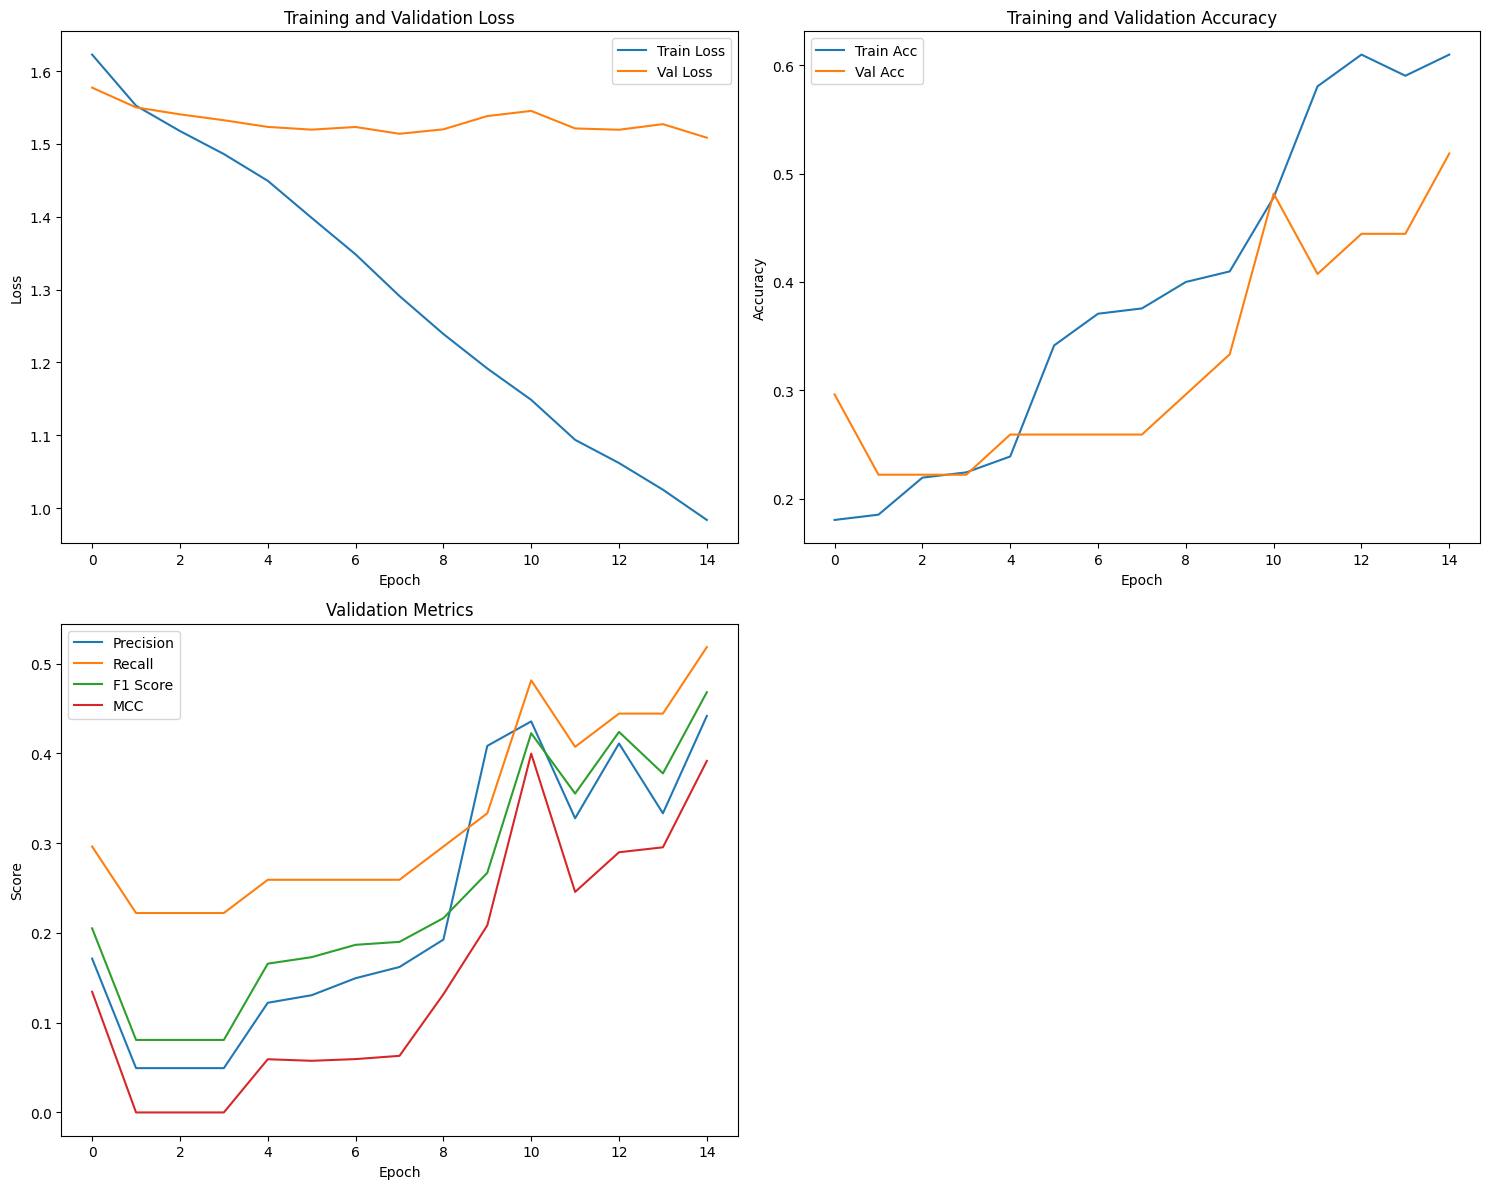

In [169]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [170]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

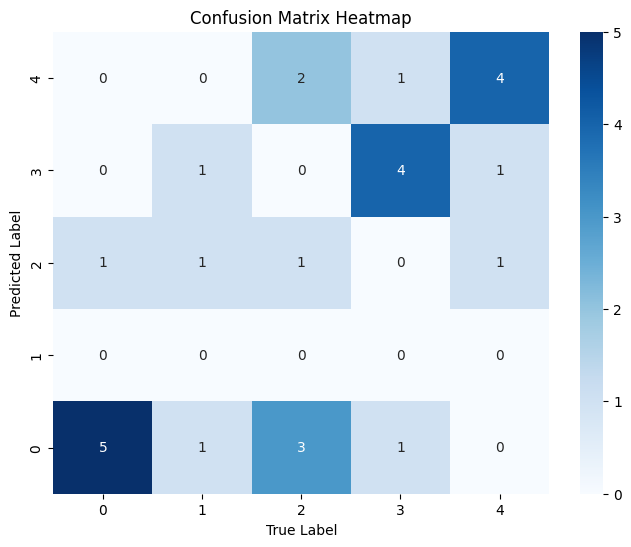

In [171]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()

In [173]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Squeeze-and-Excitation (SE) block
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction, bias=False)
        self.fc2 = nn.Linear(channels // reduction, channels, bias=False)

    def forward(self, x):
        # Global average pooling (squeeze)
        b, c, _, _ = x.size()
        y = F.adaptive_avg_pool2d(x, 1).view(b, c)

        # Two fully connected layers (excitation)
        y = F.relu(self.fc1(y))
        y = torch.sigmoid(self.fc2(y))

        # Scale the original input feature maps
        y = y.view(b, c, 1, 1)


        return x * y

# Define a simple CNN with an SE block
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.se = SEBlock(32)  # Insert SE block after the second convolution
        self.fc = nn.Linear(32 * 8 * 4, num_classes)

    def forward(self, x):
        # print(x.shape) ([32, 498, 3, 4])
        x = x.permute(0, 2, 1, 3)
        # print(x.shape)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.se(x)  # Apply SE block
        # print(x.shape)
        x = F.adaptive_avg_pool2d(x, (8, 4))  # Pool to match FC input size
        # print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



In [175]:
import torch.optim as optim


# model = TCN()
model = SimpleCNN(num_classes=5).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
val_precision_history = []
val_recall_history = []
val_f1_history = []
val_mcc_history = []

for epoch in range(20):
    model.train()
    total_loss = 0
    correct_train = 0

    for inputs, targets in balanced_loader_combined:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        out = model(inputs)
        loss = criterion(out, targets)
        loss.backward()
        # optimizer.step()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # scheduler.step(loss)

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(out, 1)
        correct_train += (predicted == targets).sum().item()

    train_loss = total_loss / len(balanced_loader_combined.dataset)
    train_acc = correct_train / len(balanced_loader_combined.dataset)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f"Epoch {epoch + 1}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_acc:.4f}")

    model.eval()
    val_total_loss = 0.0
    correct_val = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in balanced_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            val_total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(out, 1)
            correct_val += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        val_loss = val_total_loss / len(balanced_loader.dataset)
        val_acc = correct_val / len(balanced_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Compute additional metrics
        val_precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
        val_mcc = matthews_corrcoef(all_targets, all_predictions)

        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)
        val_mcc_history.append(val_mcc)

    print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}")


Epoch 1: Training Loss = 1.5914, Training Accuracy = 0.2439
Epoch 1: Validation Loss = 1.6588, Validation Accuracy = 0.2222
Epoch 2: Training Loss = 1.5230, Training Accuracy = 0.2195
Epoch 2: Validation Loss = 1.8961, Validation Accuracy = 0.2222
Epoch 3: Training Loss = 1.4574, Training Accuracy = 0.2195
Epoch 3: Validation Loss = 2.0765, Validation Accuracy = 0.2222
Epoch 4: Training Loss = 1.3967, Training Accuracy = 0.2439
Epoch 4: Validation Loss = 2.1317, Validation Accuracy = 0.2222
Epoch 5: Training Loss = 1.3276, Training Accuracy = 0.3317
Epoch 5: Validation Loss = 2.1483, Validation Accuracy = 0.2963
Epoch 6: Training Loss = 1.2388, Training Accuracy = 0.5415
Epoch 6: Validation Loss = 2.4108, Validation Accuracy = 0.4074
Epoch 7: Training Loss = 1.1527, Training Accuracy = 0.5902
Epoch 7: Validation Loss = 2.7628, Validation Accuracy = 0.4815
Epoch 8: Training Loss = 1.0816, Training Accuracy = 0.6098
Epoch 8: Validation Loss = 3.0933, Validation Accuracy = 0.5185
Epoch 9:

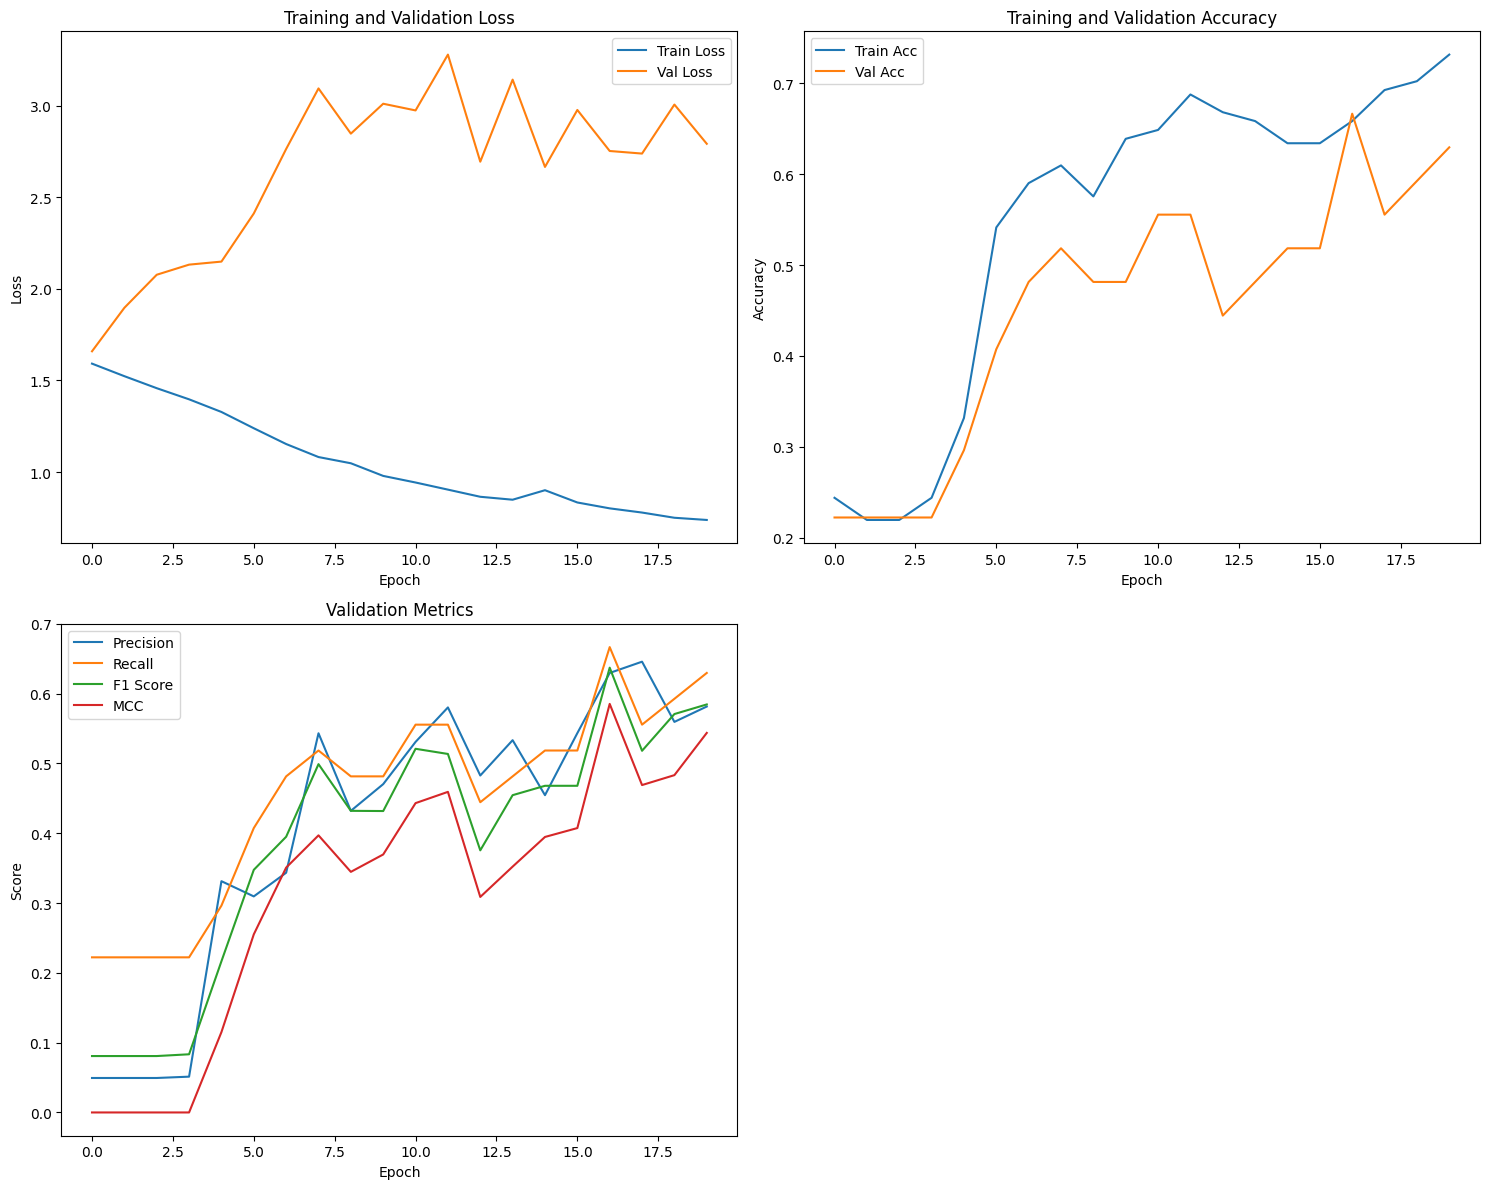

In [176]:
# Plot training and validation metrics
plt.figure(figsize=(15, 12))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation precision, recall, F1-score, and MCC
plt.subplot(2, 2, 3)
plt.plot(val_precision_history, label='Precision')
plt.plot(val_recall_history, label='Recall')
plt.plot(val_f1_history, label='F1 Score')
plt.plot(val_mcc_history, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Metrics')


plt.tight_layout()
plt.show()

In [179]:
print(val_loss_history[-1])
print(val_acc_history[-1])
print(val_recall_history[-1])
print(val_precision_history[-1])
print(val_f1_history[-1])
print(val_mcc_history[-1])

2.7912182807922363
0.6296296296296297
0.6296296296296297
0.5815295815295815
0.5845239727592668
0.5437262842651366


In [177]:
all_preds = []
all_targets = []
model.eval()

with torch.no_grad():  # Ensure no gradients are computed
    for inputs, targets in balanced_loader:
        # Move inputs and targets to the same device as the model
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        out = model(inputs)

        # Get predictions (the class with the highest score)
        _, predicts = torch.max(out, dim=1)  # Changed from `1` to `dim=1` for clarity

        # Collect predictions and targets
        all_preds.append(predicts.detach().cpu().numpy())
        all_targets.append(targets.detach().cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

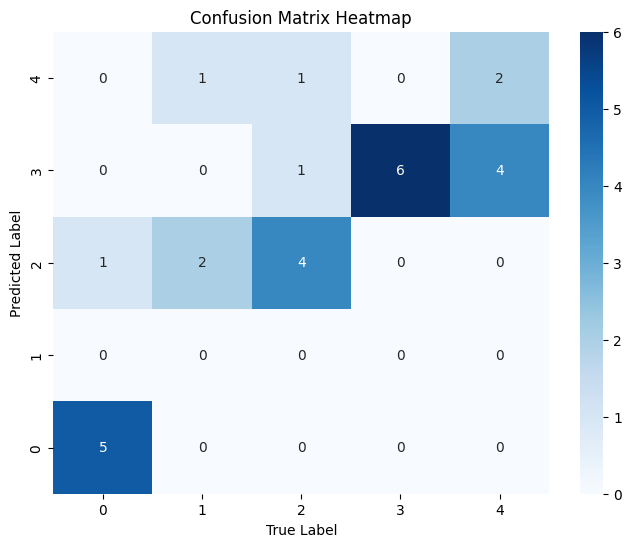

In [178]:
# Calculate the confusion matrix
conf_matrix = np.zeros((5, 5), dtype=int)
for true, pred in zip(all_targets, all_preds):
    conf_matrix[int(pred), int(true)] += 1  # Swap x and y

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=np.arange(5), yticklabels=np.arange(5))

# Reverse the y-axis
ax.invert_yaxis()

plt.xlabel('True Label')  # This was previously 'Predicted Label'
plt.ylabel('Predicted Label')  # This was previously 'True Label'
plt.title('Confusion Matrix Heatmap')
plt.show()